In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!pip install datacompy
!pip install umap
!pip install category_encoders

  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8219 sha256=7012f2dae924ee42e53c69b4066413564d29bb00456d86727eda9ba94fa88e8e
  Stored in directory: /root/.cache/pip/wheels/73/2b/f6/26e9f84153c25050fe7c09e88f8e32a6be3c7034a38c418319
Successfully built ordered-set
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=3758d68725a835f5d347960fd32dd43ea7830902211da7f15e3572e70d372b0e
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap
     |████████████████████████████████| 82 kB 442 kB/s 


<center> <h1><b>Implémentez un modèle de scoring</h1> 


Projet 7 du parcous **Data Scientist** d'OpenClassrooms</center>




---
---







<h2>Auteur</h2>

<p><a href="https://www.linkedin.com/khalil-henchi" target="_blank" rel="external">Khalil Henchi</a></p>

# 1. Présentation du projet 
<a class="anchor" id="title1"></a> 

### 1.1 Contexte
<a class="anchor" id="title2"></a>
Je me présente Khalil Henchi. Je suis Data Scientist au sein de la société financière **Prêt à dépenser**. 
 
> Notre société propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

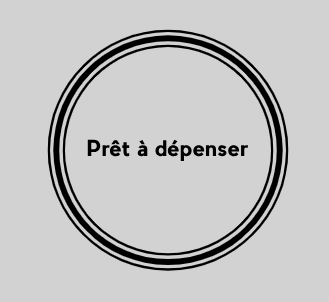

L’entreprise souhaite **mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité** qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un **algorithme de classification** en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de **transparence** vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

**Prêt à dépenser** décide donc de **développer un dashboard interactif** pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 

**Les données**

> Voici [les données](https://www.kaggle.com/c/home-credit-default-risk/data) dont vous aurez besoin pour réaliser le dashboard. Pour plus de simplicité, vous pouvez les télécharger à [cette adresse](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Impl%C3%A9menter+un+mod%C3%A8le+de+scoring/Projet+Mise+en+prod+-+home-credit-default-risk.zip).



> Il y a sûrement besoin de joindre les différentes tables entre elles.

### 1.2 Présentation de la Problématique
<a class="anchor" id="title3"></a>

**Mes missions**

Durant ce projet, mes missions principales sont : 

1. Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.

2. Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.

> **Attention** : 

>**Michaël**, mon manager, m'incite à sélectionner un kernel Kaggle pour me faciliter la préparation des données nécessaires à l’élaboration du modèle de scoring. J'analyserai ce kernel et l’adapterai pour m'assurer qu’il répond aux besoins de ma mission.

> L'idée est de focaliser sur l’élaboration du modèle, son optimisation et sa compréhension

**Spécifications du dashboard**

**Michaël** m'a fourni des spécifications pour le dashboard interactif. Celui-ci devra contenir au minimum les fonctionnalités suivantes :

* Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science.
* Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre).
* Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.

---



---



### 1.3 Livrables attendus
<a class="anchor" id="title4"></a>

* Le dashboard interactif répondant aux spécifications ci-dessus et l’API de prédiction du score, déployées chacunes sur le cloud.
* Un dossier sur un outil de versioning de code contenant :
  * Le code de la modélisation (du prétraitement à la prédiction)
  * Le code générant le dashboard
  * Le code permettant de déployer le modèle sous forme d'API
* Une note méthodologique décrivant :
  * La méthodologie d'entraînement du modèle (2 pages maximum)
  * La fonction coût métier, l'algorithme d'optimisation et la métrique d'évaluation (1 page maximum)
  * L’interprétabilité globale et locale du modèle (1 page maximum)
  * Les limites et les améliorations possibles (1 page maximum)
* Un support de présentation pour la soutenance, détaillant le travail réalisé.



> Pour faciliter votre passage au jury, déposez sur la plateforme, dans un dossier nommé **P7_nom_prenom**, tous les livrables du projet. 

> Chaque livrable doit être nommé avec le numéro du projet et selon l'ordre dans lequel il apparaît, par exemple : 
*   **P7_01_dashboard** 
*   **P7_02_dossier**
*   **P7_03_note**
*   **P7_04_support**
*   et ainsi de suite.




### 1.4 Modalités de la soutenance
<a class="anchor" id="title5"></a>

Pendant la soutenance, l’évaluateur jouera le rôle de Michaël, à qui je présente mon travail. 

* Présentation **20 minutes** 
  * Rappel de la problématique et présentation du jeu de données **5 minutes**
  * Explication de l’approche de modélisation **10 minutes**
  * Présentation du dashboard **5 minutes**
* Discussion **5 minutes**
  * L’évaluateur, jouant le rôle de Michaël, me challengera sur mes choix. 
* Débriefing **5 minutes**
  * À la fin de la soutenance, l'évaluateur arrêtera de jouer le rôle de Michaël pour me permettre de débriefer ensemble. 

> J'ai **20 min** pour la présentation 

### 1.5 Compétences évaluées

<a class="anchor" id="title5"></a>

Pendant ce projet, les compétences suivantes seraient évaluées par le jury évaluateur.


***Compétences évaluées***

* **Présenter son travail de modélisation à l'oral**
* **Réaliser un dashboard pour présenter son travail de modélisation**
* **Rédiger une note méthodologique afin de communiquer sa démarche de modélisation**
* **Utiliser un logiciel de version de code pour assurer l’intégration du modèle**
* **Déployer un modèle via une API dans le Web**



---



---



# 2. Environnement et chargement des librairies
<a class="anchor" id="title11"></a>

### 2.1 Préparation de l'environnement de travail
<a class="anchor" id="title12"></a>

J'ai déja installer python3 sur mon PC. Et j'ai installé le librairie "virtualenv" aussi en utilisant 

Linux Terminal
```
$ pip3 install virtualenv
```


1. Créer un nouveau environement virtuel

Linux Terminal

```
$ cd /Documents/My_OC_DS_Formation/
$ mkdir P7
$ cd P7
$ virtualenv -p python3 .
```

2. Activer l'environement virtuel

Linux Terminal
```
$ source bin/activate
```
3. Installer Jupyter notebook

Linux Terminal
```
(P7) $ python -V
Python 3.8.5
(P7) $ pip install jupyter notebook
```

4. Démarer Jupyter notebook

Linux Terminal
```
(P7) $ jupyter notebook
```
Une page web s'ouvrira dans le navigateur avec Jupyter Notebook prêt.

5. Commencer le travail

Créer un nouveau notebook, définir son nom. 

Commencer à coder et installer les librairies nécessaires au fur et à mesure.  

Utiliser la commande suivante pour installer une librairie soit directement dans le terminal or dans les cellules jupyter notebook.

Linux Terminal
```
(P7) $ pip3 install nom_de_librairie
```

6. Désactiver l'environement virtuel 

Pour desactiver l'environement virtuel et utiliser l'environement original. Utiliser la commande suivante.

Linux Terminal
```
(P7) $ deactivate
```

> Pour plus d'informations, vérifier la documentation **virtualenv**.

### 2.2 Chargement des librairies nécessaires
<a class="anchor" id="title13"></a> 

Dans cette section, nous chargeons les librairies nécessaires pour analyser le jeu de données et répondre à nos questions. 

In [ ]:
# Chargement des  librairies
import os, pathlib, random, pickle
# data manipulation
import numpy as np
import pandas as pd

# ignorer les warnings messages 
import warnings 
warnings.filterwarnings('ignore')

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns
try:
  import missingno as msno
except:
  ! pip install missingno
  import missingno as msno


## Define display config 
# Définir le nombre max de lignes et de colonnes par table 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="whitegrid")
plt.style.use("ggplot")
%matplotlib inline

font = {'family': 'cursive',
        'color':  '#000000',
        'weight': 'bold',
        'size': 14
        }

plt.rcParams['axes.titlesize']   = font['size']
plt.rcParams['axes.titleweight'] = font['weight']
plt.rcParams['axes.titlecolor']  = font['color']


In [ ]:
#path for data folder
path = "../gdrive/MyDrive/P7"

#### Utilities 

In [ ]:
def data_details(data):

    """
    Cette fonction permet, pour un jeu de données, de présenter, visualiser:
      - le nombre de lignes 
      - le nombre de colonnes
      - le type de data dans chaque colonne 
      - le nom de colonne 
      - le nombre de valeur unique dans chaque colonne
      - Une liste contenant les valeurs uniques de chaque colonne, si 
        la longeur de la liste ne dépasse pas 100 valeurs 
      - le nombre de valeurs manquantes dans chaque colonne 
      - le pourcentage de valeurs manquant dans chaque colonne  

    """

    print(f'Le jeu de données contient {data.shape[0]} lignes et {data.shape[1]} colonnes.')
    columns = data.columns

    Nan_counts=data.isnull().sum().tolist()
    Nan_ratio=(data.isnull().sum()/len(data)).values

    Type = data.dtypes.tolist()
    count = [len(data[i].unique()) for  i  in columns]
       
    df = pd.DataFrame({'Columns name':columns, 
                                 'Type':Type, 
                                 '# unique values':count,
                                 '# Nan values':Nan_counts,
                                 '% Nan values':Nan_ratio * 100
                                 })
    return df

def data_summary(data):
  """
  Cette fonction fournie un resume du jeu de doonees:
    - le nombre de lignes 
    - le nombre de colonnes
    - le nombre de datatype des colonnes 
    - le pourcentage de valeurs manquantes dans le jeu de donnees   
  """
  
  total_per_missing_data = (data.isnull().sum()/len(data)).values.\
  sum()/data.shape[1]*100
  
  df= pd.DataFrame({'# Columns':data.shape[1],
                    '# Rows':data.shape[0],
                    '# Col Types':data.dtypes.nunique(),
                    'Col Types and #':[[(index,count) for count, index in 
                                        zip(data.dtypes.value_counts(),
                                            data.dtypes.value_counts().index)
                                        ]],
                    'Nan total %':total_per_missing_data
                    })
  return df

def data_plot(x):
  plt.figure(figsize=(5, 5))
  plt.pie(x=np.squeeze(x), 
          labels = ['% valeur manquante', '% valeur non manquante'],
          autopct='%1.1f%%',
          explode=(0, 0.1),
          shadow=True, 
          startangle=0,
          )
  plt.title('% total des Nan dans le dataset')
  plt.legend(title="Legend",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()


def data_presentation(data):
  """
  Cette fonction fournie une représentation du jeu de doonees   
  """
  print()
  print()
  print('Afficher les 5 premiers lignes du dataset')
  print()
  print()
  display(data.head())
  
  print()
  print()
  print('Afficher les 5 derniers lignes du dataset')
  print()
  print()
  display(data.tail())

  print()
  print()
  print('Afficher un resume du dataset')
  print()
  print()
  df_summary = data_summary(data)
  display(df_summary)

  
  print()
  print()
  print('Afficher un resume des colonnes du dataset')
  print()
  print()
  df_details = data_details(data)
  display(df_details)

  print()
  print()
  print('Afficher un resume des types de colonnes du dataset')
  print()
  print()
  display(df_details.Type.value_counts().to_frame())
  
  print()
  print()
  print('Pourcentage des valeurs manquantes dans le dataset')
  print()
  print()
  data_plot([df_summary.iloc[:,-1], 
             100 - df_summary.iloc[:,-1]]
            )
  
  return None


def shape_details(df):
  print(f"Nombre de lignes : {df.shape[0]}")
  print(f"Nombre de colonnes : {df.shape[1]}")
  return None

def data_checking(df):
  """
  Get information related to the data frame data as:
  - Head
  - Tail
  - Missing values percentage and numbers 
  - Number of unique values
  - Number of different columns type   

  """

  shape_details(df)
  print(100*'__')
  print(100*'__')
  data_presentation(df)
  print(100*'__')
  print(100*'__')
  msno.bar(df)


# change the type of datetime columns

def change_dtype_to_datetime(df, col):
  """
  Cast the dtype of a column to datetime dtype
  """

  df_col = pd.to_datetime(df[col], 
                           errors='coerce')
  return df_col
  

# 3. Présentation et préparation des données
<a class="anchor" id="title11"></a>

### 3.1 Présentation des données


Dans cette partie, nous intéressons à charger les jeux de données et à avoir une vision globale sur chaque jeu.

#### application_train

In [ ]:
# Read data
application_train = pd.read_csv(os.path.join(path, "application_train.csv"),
                              encoding="utf-8")
application_train.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

Nombre de lignes : 307511
Nombre de colonnes : 122
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Afficher les 5 premiers lignes du dataset




SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        



Afficher les 5 derniers lignes du dataset




SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            



Afficher un resume du dataset




# Columns  # Rows  # Col Types                             Col Types and #  \
0        122  307511            3  [(float64, 65), (int64, 41), (object, 16)]   

   Nan total %  
0    24.395942



Afficher un resume des colonnes du dataset


Le jeu de données contient 307511 lignes et 122 colonnes.


Columns name     Type  # unique values  # Nan values  \
0                      SK_ID_CURR    int64           307511             0   
1                          TARGET    int64                2             0   
2              NAME_CONTRACT_TYPE   object                2             0   
3                     CODE_GENDER   object                3             0   
4                    FLAG_OWN_CAR   object                2             0   
5                 FLAG_OWN_REALTY   object                2             0   
6                    CNT_CHILDREN    int64               15             0   
7                AMT_INCOME_TOTAL  float64             2548             0   
8                      AMT_CREDIT  float64             5603             0   
9                     AMT_ANNUITY  float64            13673            12   
10                AMT_GOODS_PRICE  float64             1003           278   
11                NAME_TYPE_SUITE   object                8          1292   
12               NAME_INCOME_TYPE   object                8             0   
13            NAME_EDUCATION_TYPE   object                5             0   
14             NAME_FAMILY_STATUS   object                6             0   
15              NAME_HOUSING_TYPE   object                6             0   
16     REGION_POPULATION_RELATIVE  float64               81             0   
17                     DAYS_BIRTH    int64            17460             0   
18                  DAYS_EMPLOYED    int64            12574             0   
19              DAYS_REGISTRATION  float64            15688             0   
20                DAYS_ID_PUBLISH    int64             6168             0   
21                    OWN_CAR_AGE  float64               63        202929   
22                     FLAG_MOBIL    int64                2             0   
23                 FLAG_EMP_PHONE    int64                2             0   
24                FLAG_WORK_PHONE    int64                2             0   
25               FLAG_CONT_MOBILE    int64                2             0   
26                     FLAG_PHONE    int64                2             0   
27                     FLAG_EMAIL    int64                2             0   
28                OCCUPATION_TYPE   object               19         96391   
29                CNT_FAM_MEMBERS  float64               18             2   
30           REGION_RATING_CLIENT    int64                3             0   
31    REGION_RATING_CLIENT_W_CITY    int64                3             0   
32     WEEKDAY_APPR_PROCESS_START   object                7             0   
33        HOUR_APPR_PROCESS_START    int64               24             0   
34     REG_REGION_NOT_LIVE_REGION    int64                2             0   
35     REG_REGION_NOT_WORK_REGION    int64                2             0   
36    LIVE_REGION_NOT_WORK_REGION    int64                2             0   
37         REG_CITY_NOT_LIVE_CITY    int64                2             0   
38         REG_CITY_NOT_WORK_CITY    int64                2             0   
39        LIVE_CITY_NOT_WORK_CITY    int64                2             0   
40              ORGANIZATION_TYPE   object               58             0   
41                   EXT_SOURCE_1  float64           114585        173378   
42                   EXT_SOURCE_2  float64           119832           660   
43                   EXT_SOURCE_3  float64              815         60965   
44                 APARTMENTS_AVG  float64             2340        156061   
45               BASEMENTAREA_AVG  float64             3781        179943   
46    YEARS_BEGINEXPLUATATION_AVG  float64              286        150007   
47                YEARS_BUILD_AVG  float64              150        204488   
48                 COMMONAREA_AVG  float64             3182        214865   
49                  ELEVATORS_AVG  float64              258        163891   
50                  ENTRANCES_AVG  float64              286        154828   
51               



Afficher un resume des types de colonnes du dataset




Type
float64    65
int64      41
object     16



Pourcentage des valeurs manquantes dans le dataset




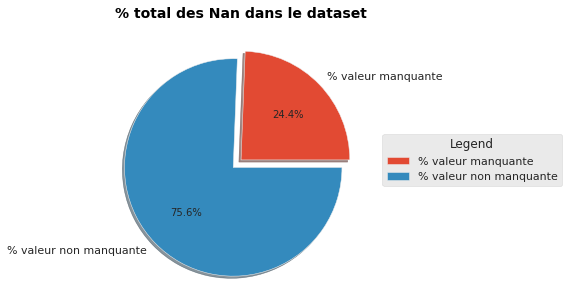

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


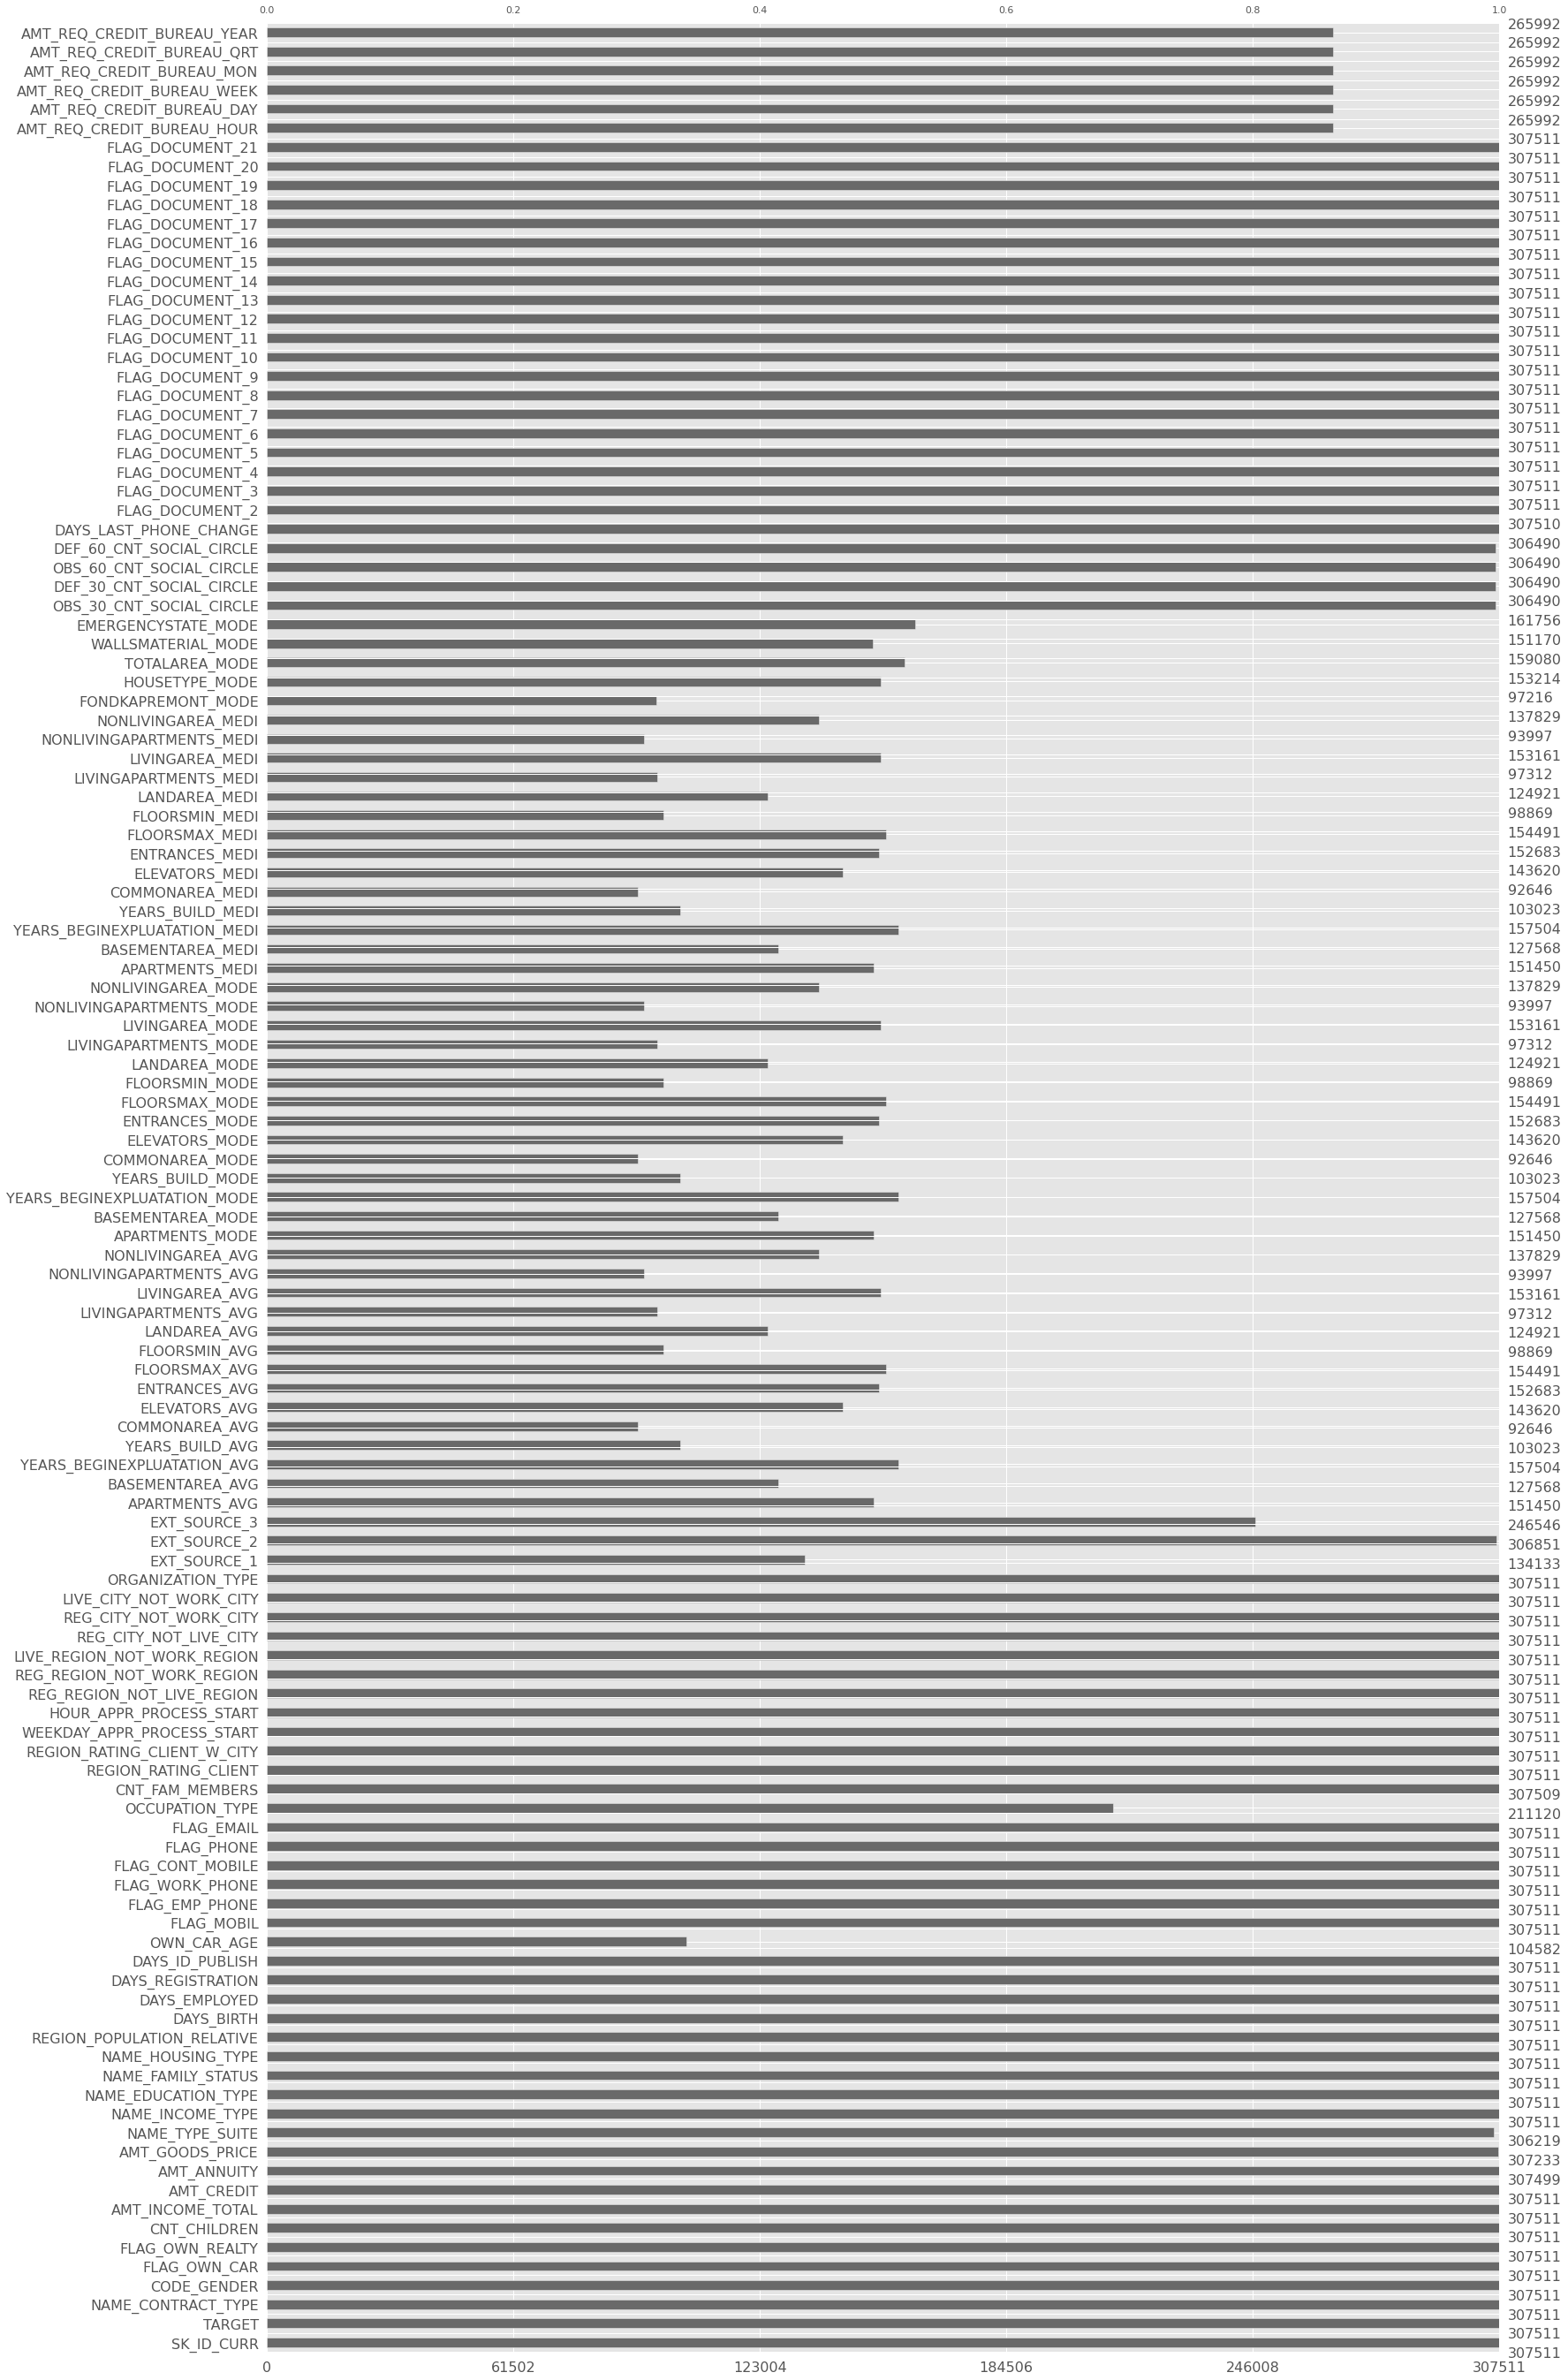

In [ ]:
data_checking(application_train)



##### Données manquantes

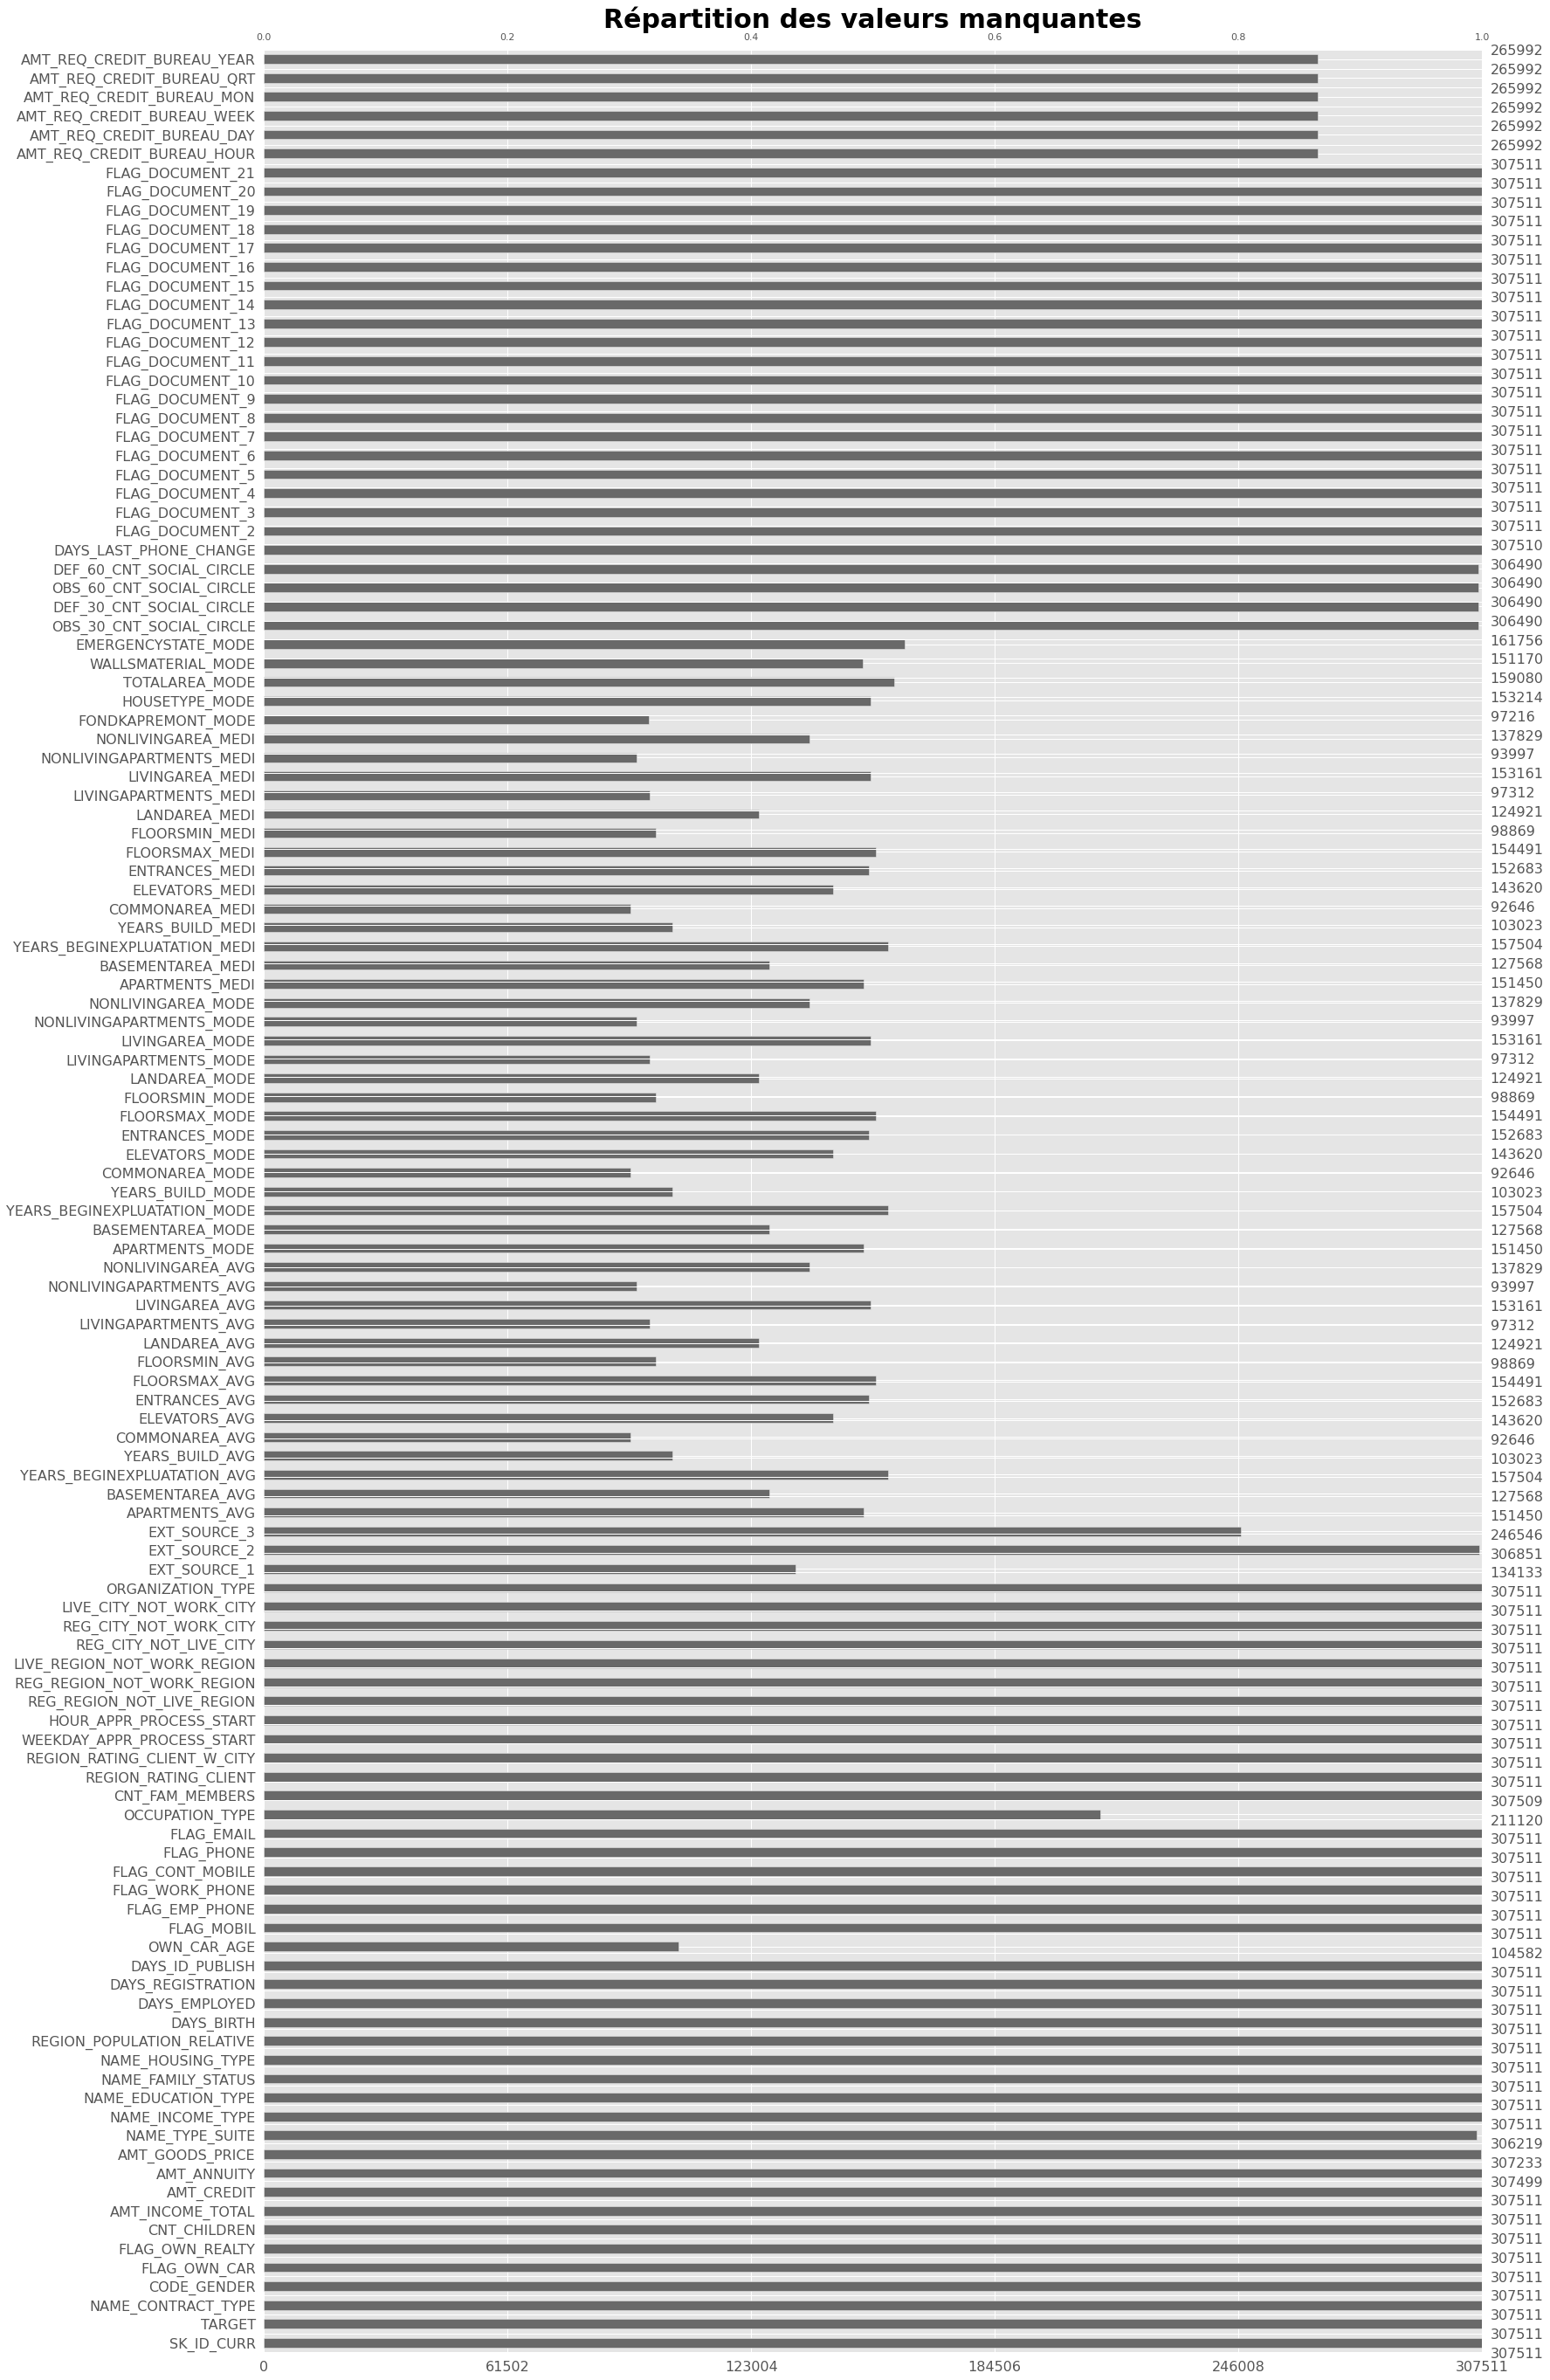

In [ ]:
_= msno.bar(application_train)
_= plt.title("Répartition des valeurs manquantes", fontdict={'fontsize':30})

#### application_test

In [ ]:
# Read data
application_test = pd.read_csv(os.path.join(path, "application_test.csv"),
                              encoding="utf-8")

application_test.head()



SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

Nombre de lignes : 48744
Nombre de colonnes : 121
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Afficher les 5 premiers lignes du dataset




SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   



Afficher les 5 derniers lignes du dataset




SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
48739         270000.0   Unaccompanied               Working   
48740         495000.0   Unaccompanied  Commercial associate   
48741         315000.0   Unaccompanied  Commercial associate   
48742         450000.0          Family  Commercial associate   
48743         270000.0   Unaccompanied               Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
48739  Secondary / secondary special              Widow  House / apartment   
48740  Secondary / secondary special            Married  House / apartment   
48741  Secondary / secondary special            Married  House / apartment   
48742               Higher education            Married  House / apartment   
48743  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
48739                    0.002042      -19970          -5169   
48740                    0.035792      -11186          -1149   
48741                    0.026392      -15922          -3037   
48742                    0.018850      -13968          -2731   
48743                    0.006629      -13962           -633   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
48739            -9094.0            -3399          NaN           1   
48740            -3015.0            -3003          NaN           1   
48741            -2681.0            -1504          4.0           1   
48742            -1461.0            -1364          NaN           1   
48743            -1072.0            -4220         22.0           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
48739               1                1                 1           1   
48740               1                0                 1           0   
48741               1                0                 1           1   
48742               1                1                 1           1   
48743               1                1                 1           0   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
48739           0             NaN              1.0                     3   
48740           0     Sales staff              4.0                     2   
48741           0             NaN              3.0                     2   
48742           0        Managers              2.0                     2   
48743           0      Core staff              2.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
48739                            3                  WEDNESDAY   
48740                            2                     MONDAY   
48741                            2                  WEDNESDAY   
48742                            2                     MONDAY   
48743                            2                    TUESDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
48739                       16                           0   
48740                       11                           0



Afficher un resume du dataset




# Columns  # Rows  # Col Types                             Col Types and #  \
0        121   48744            3  [(float64, 65), (int64, 40), (object, 16)]   

   Nan total %  
0    23.811687



Afficher un resume des colonnes du dataset


Le jeu de données contient 48744 lignes et 121 colonnes.


Columns name     Type  # unique values  # Nan values  \
0                      SK_ID_CURR    int64            48744             0   
1              NAME_CONTRACT_TYPE   object                2             0   
2                     CODE_GENDER   object                2             0   
3                    FLAG_OWN_CAR   object                2             0   
4                 FLAG_OWN_REALTY   object                2             0   
5                    CNT_CHILDREN    int64               11             0   
6                AMT_INCOME_TOTAL  float64              606             0   
7                      AMT_CREDIT  float64             2937             0   
8                     AMT_ANNUITY  float64             7492            24   
9                 AMT_GOODS_PRICE  float64              677             0   
10                NAME_TYPE_SUITE   object                8           911   
11               NAME_INCOME_TYPE   object                7             0   
12            NAME_EDUCATION_TYPE   object                5             0   
13             NAME_FAMILY_STATUS   object                5             0   
14              NAME_HOUSING_TYPE   object                6             0   
15     REGION_POPULATION_RELATIVE  float64               81             0   
16                     DAYS_BIRTH    int64            15477             0   
17                  DAYS_EMPLOYED    int64             7863             0   
18              DAYS_REGISTRATION  float64            12618             0   
19                DAYS_ID_PUBLISH    int64             5880             0   
20                    OWN_CAR_AGE  float64               53         32312   
21                     FLAG_MOBIL    int64                2             0   
22                 FLAG_EMP_PHONE    int64                2             0   
23                FLAG_WORK_PHONE    int64                2             0   
24               FLAG_CONT_MOBILE    int64                2             0   
25                     FLAG_PHONE    int64                2             0   
26                     FLAG_EMAIL    int64                2             0   
27                OCCUPATION_TYPE   object               19         15605   
28                CNT_FAM_MEMBERS  float64               12             0   
29           REGION_RATING_CLIENT    int64                3             0   
30    REGION_RATING_CLIENT_W_CITY    int64                4             0   
31     WEEKDAY_APPR_PROCESS_START   object                7             0   
32        HOUR_APPR_PROCESS_START    int64               24             0   
33     REG_REGION_NOT_LIVE_REGION    int64                2             0   
34     REG_REGION_NOT_WORK_REGION    int64                2             0   
35    LIVE_REGION_NOT_WORK_REGION    int64                2             0   
36         REG_CITY_NOT_LIVE_CITY    int64                2             0   
37         REG_CITY_NOT_WORK_CITY    int64                2             0   
38        LIVE_CITY_NOT_WORK_CITY    int64                2             0   
39              ORGANIZATION_TYPE   object               58             0   
40                   EXT_SOURCE_1  float64            27208         20532   
41                   EXT_SOURCE_2  float64            38886             8   
42                   EXT_SOURCE_3  float64              703          8668   
43                 APARTMENTS_AVG  float64             1544         23887   
44               BASEMENTAREA_AVG  float64             2817         27641   
45    YEARS_BEGINEXPLUATATION_AVG  float64              176         22856   
46                YEARS_BUILD_AVG  float64              131         31818   
47                 COMMONAREA_AVG  float64             2043         33495   
48                  ELEVATORS_AVG  float64              182         25189   
49                  ENTRANCES_AVG  float64              201         23579   
50                  FLOORSMAX_AVG  float64              253         23321   
51               



Afficher un resume des types de colonnes du dataset




Type
float64    65
int64      40
object     16



Pourcentage des valeurs manquantes dans le dataset




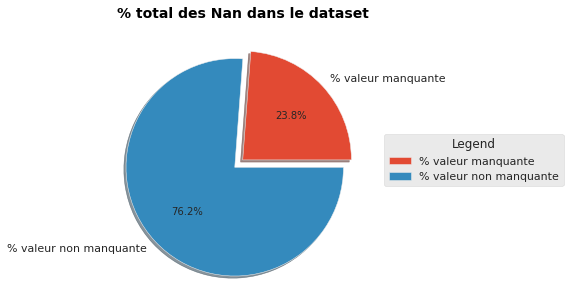

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


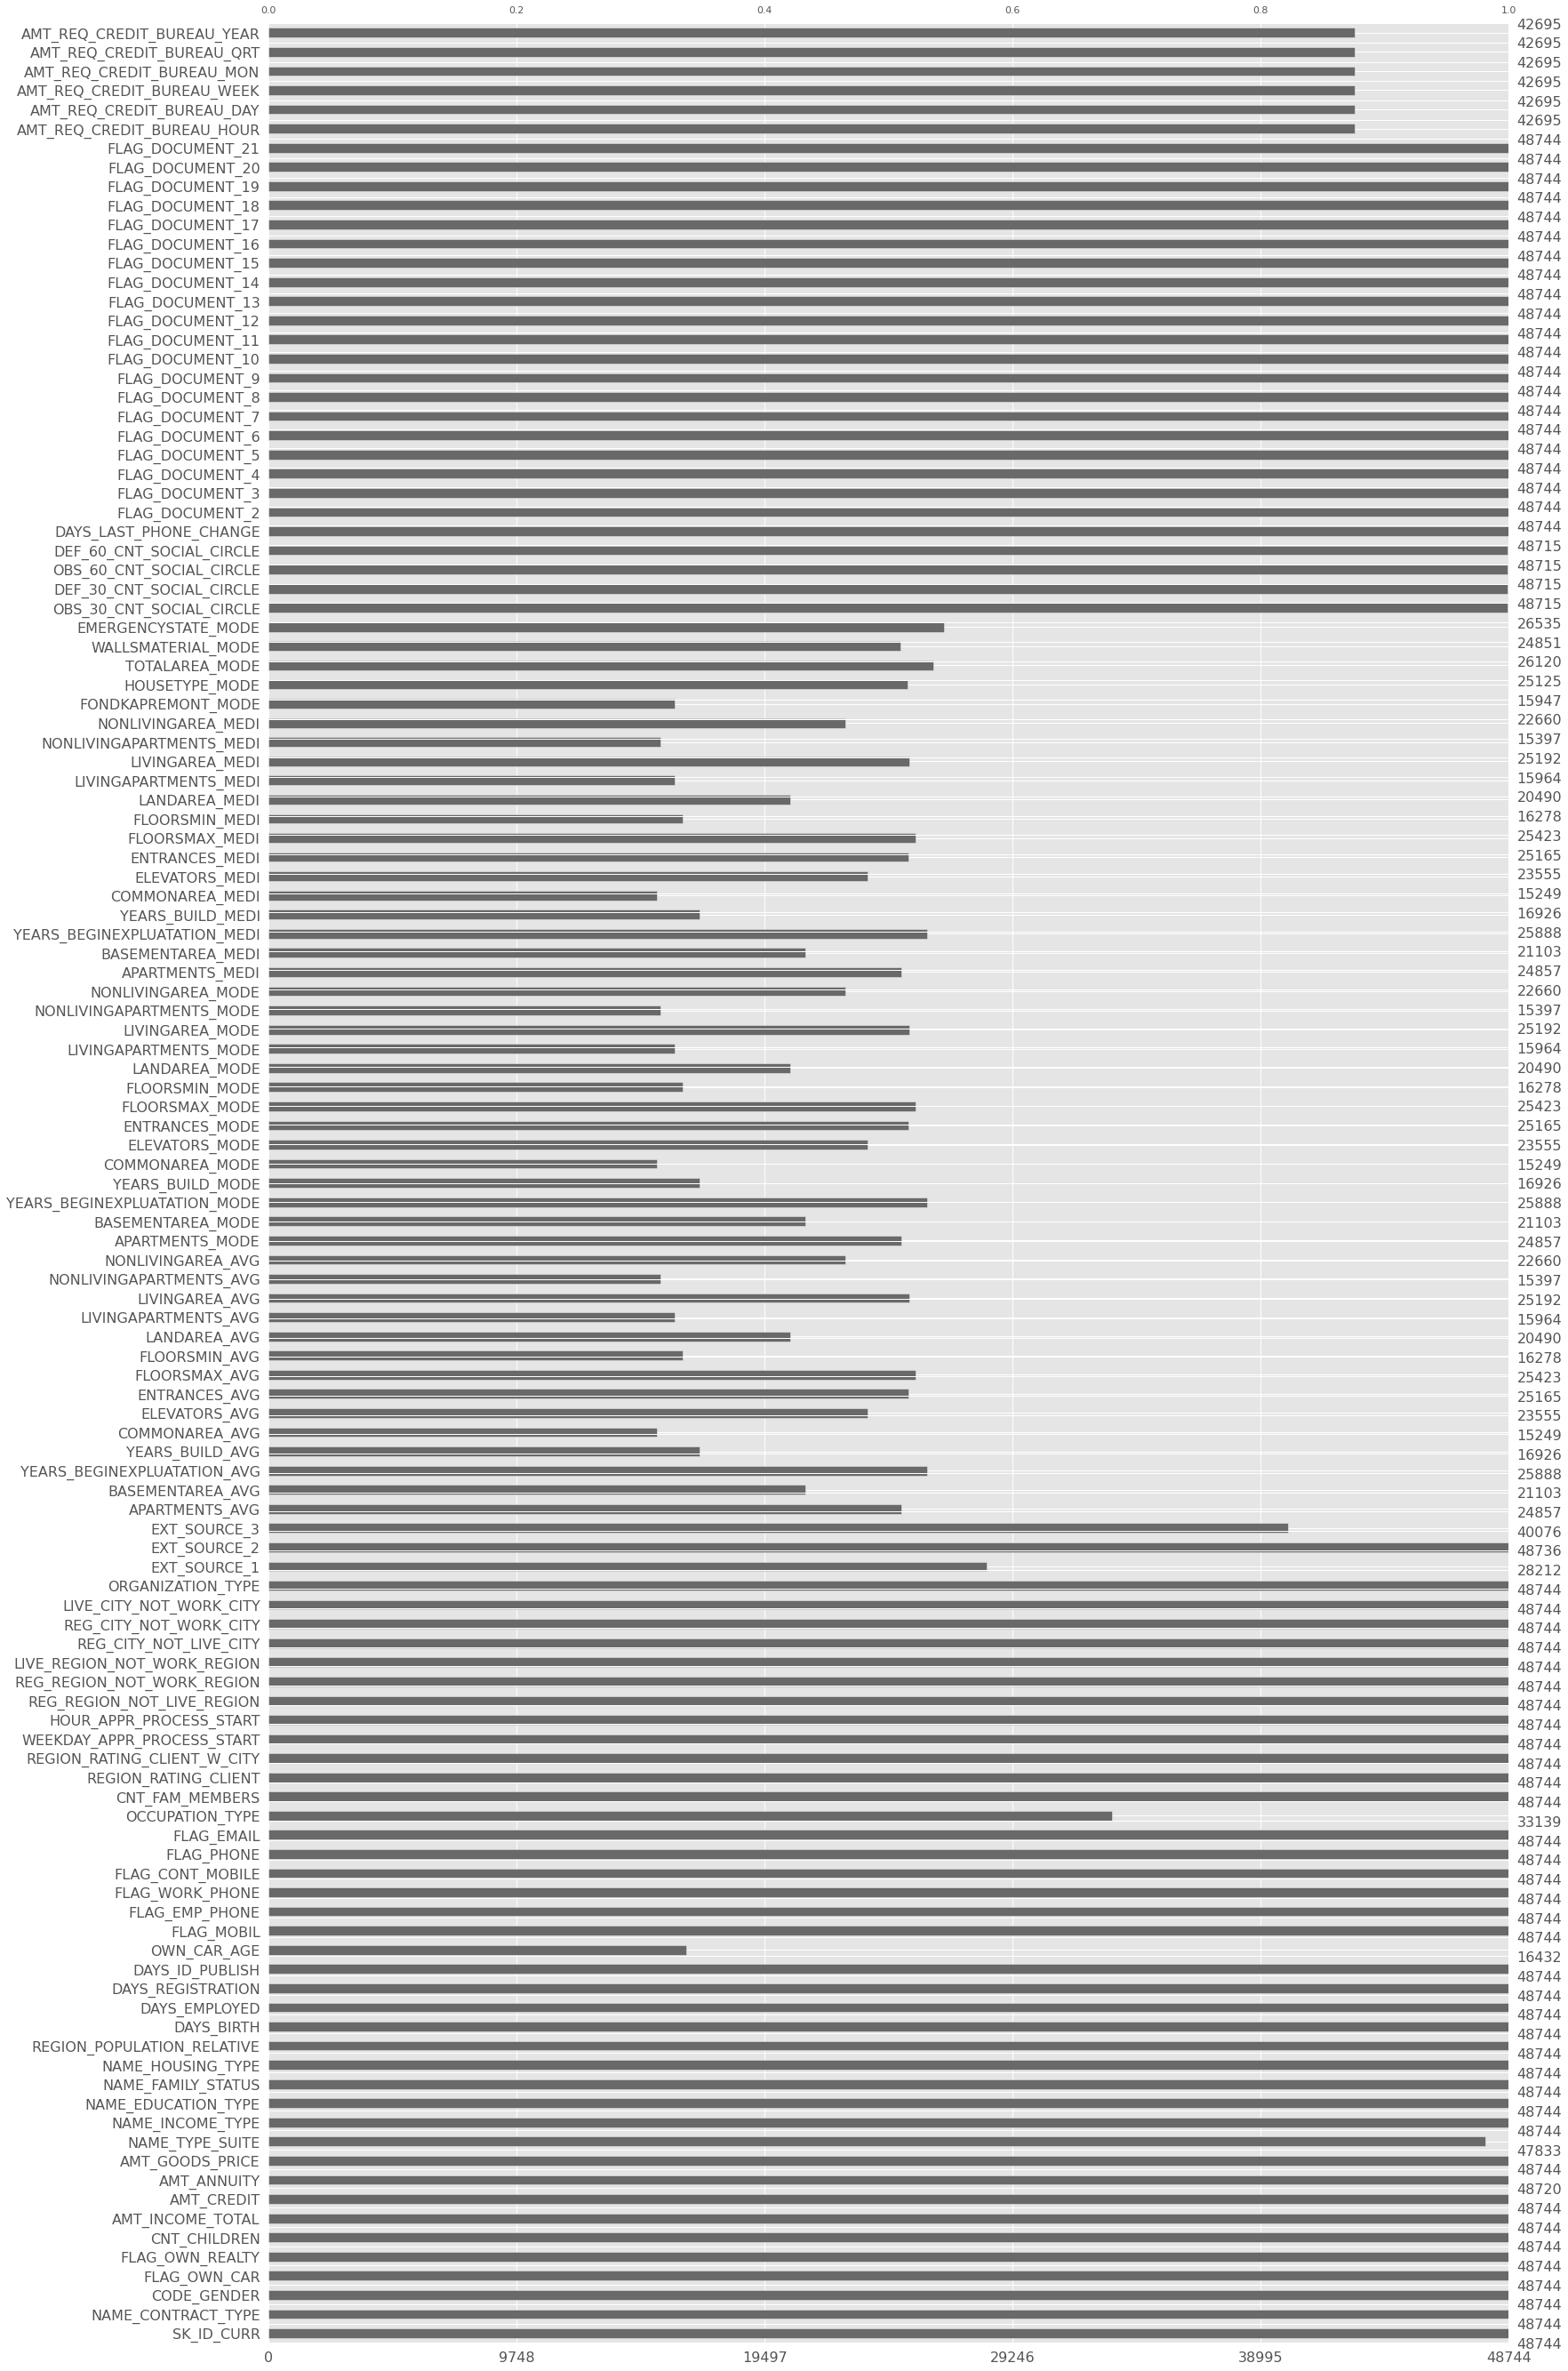

In [ ]:
data_checking(application_test)



##### Données manquantes

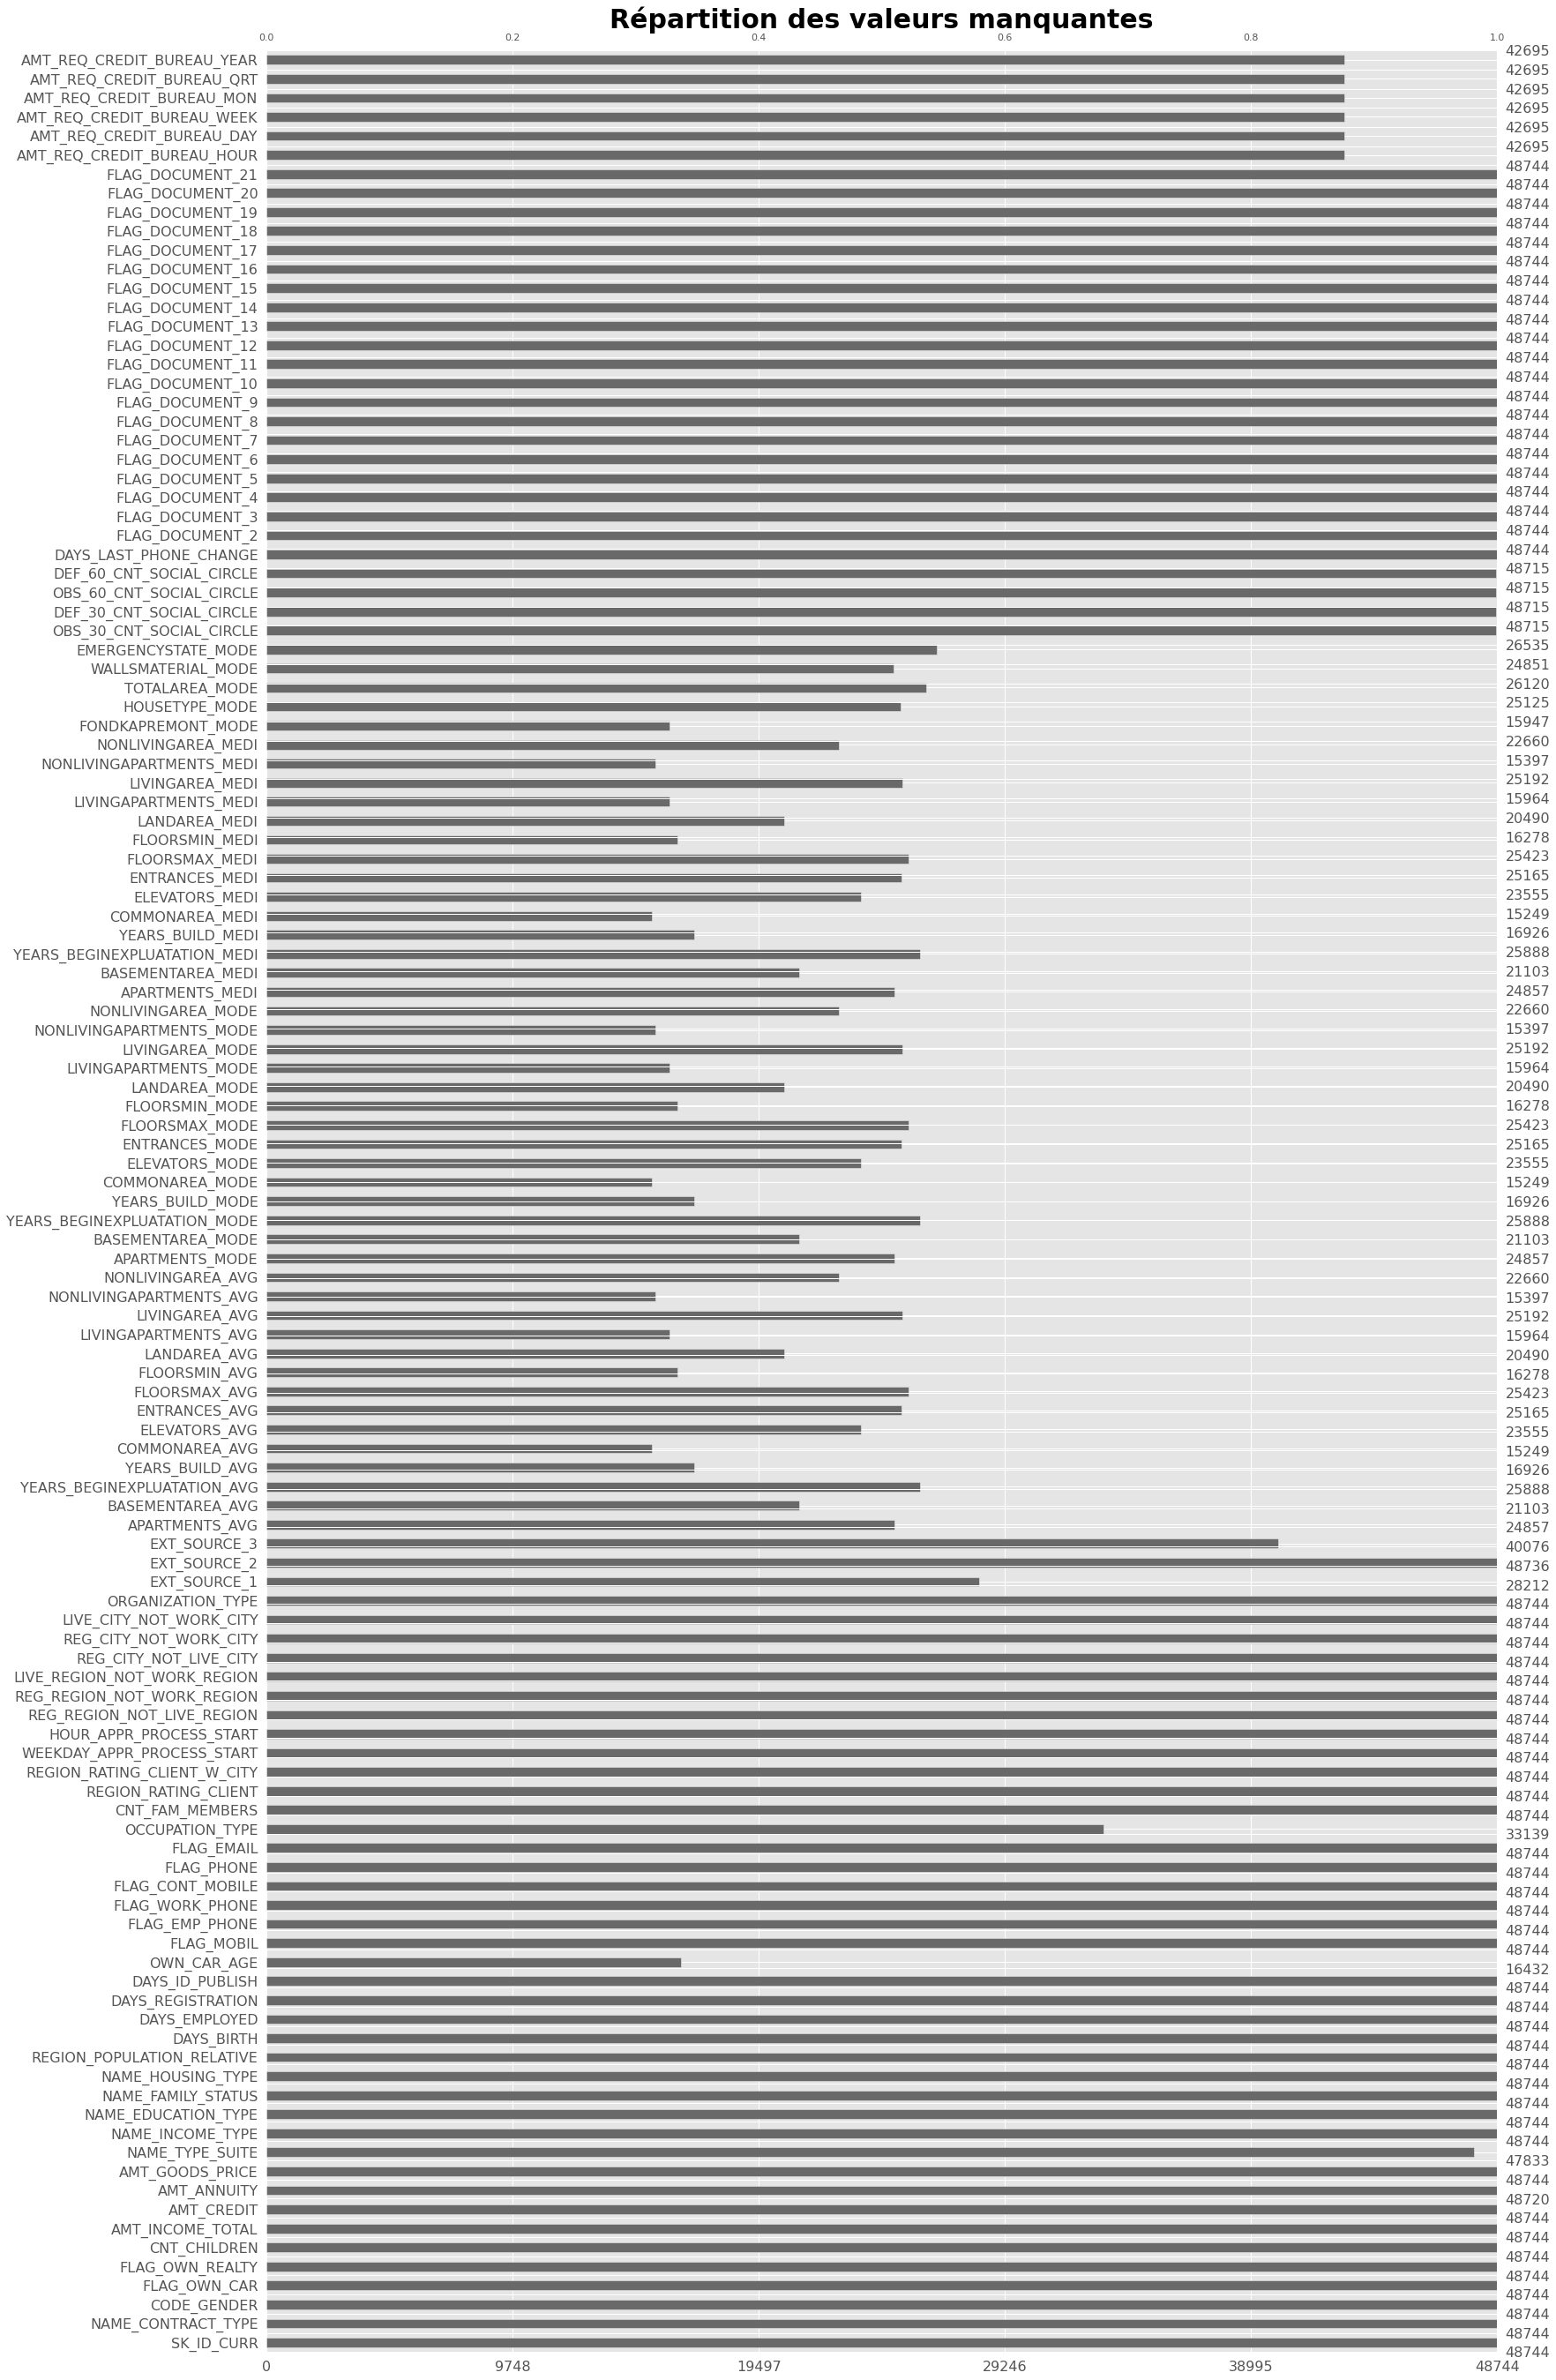

In [ ]:
_= msno.bar(application_test)
_= plt.title("Répartition des valeurs manquantes", fontdict={'fontsize':30})

#### bureau

In [ ]:
# Read data
bureau = pd.read_csv(os.path.join(path, "bureau.csv"),
                              encoding="utf-8")
bureau.head()



SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

Nombre de lignes : 1716428
Nombre de colonnes : 17
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Afficher les 5 premiers lignes du dataset




SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN



Afficher les 5 derniers lignes du dataset




SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
1716423                   0                -30.0                NaN   
1716424                   0              -2433.0            -2493.0   
1716425                   0              -1628.0             -970.0   
1716426                   0              -1513.0            -1513.0   
1716427                   0                  NaN             -387.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
1716423                     0.0                   0        11250.00   
1716424                  5476.5                   0        38130.84   
1716425                     NaN                   0        15570.00   
1716426                     NaN                   0        36000.00   
1716427                     NaN                   0        22500.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
1716423              11250.0                   0.0                     0.0   
1716424                  0.0                   0.0                     0.0   
1716425                  NaN                   NaN                     0.0   
1716426                  0.0                   0.0                     0.0   
1716427                  0.0                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
1716423        Microloan                 -19          NaN  
1716424  Consumer credit               -2493          NaN  
1716425  Consumer credit                -967          NaN  
1716426  Consumer credit               -1508          NaN  
1716427        Microloan                -387          NaN



Afficher un resume du dataset




# Columns   # Rows  # Col Types                          Col Types and #  \
0         17  1716428            3  [(float64, 8), (int64, 6), (object, 3)]   

   Nan total %  
0    13.502552



Afficher un resume des colonnes du dataset


Le jeu de données contient 1716428 lignes et 17 colonnes.


Columns name     Type  # unique values  # Nan values  \
0               SK_ID_CURR    int64           305811             0   
1             SK_ID_BUREAU    int64          1716428             0   
2            CREDIT_ACTIVE   object                4             0   
3          CREDIT_CURRENCY   object                4             0   
4              DAYS_CREDIT    int64             2923             0   
5       CREDIT_DAY_OVERDUE    int64              942             0   
6      DAYS_CREDIT_ENDDATE  float64            14097        105553   
7        DAYS_ENDDATE_FACT  float64             2918        633653   
8   AMT_CREDIT_MAX_OVERDUE  float64            68252       1124488   
9       CNT_CREDIT_PROLONG    int64               10             0   
10          AMT_CREDIT_SUM  float64           236709            13   
11     AMT_CREDIT_SUM_DEBT  float64           226538        257669   
12    AMT_CREDIT_SUM_LIMIT  float64            51727        591780   
13  AMT_CREDIT_SUM_OVERDUE  float64             1616             0   
14             CREDIT_TYPE   object               15             0   
15      DAYS_CREDIT_UPDATE    int64             2982             0   
16             AMT_ANNUITY  float64            40322       1226791   

    % Nan values  
0       0.000000  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
5       0.000000  
6       6.149573  
7      36.916958  
8      65.513264  
9       0.000000  
10      0.000757  
11     15.011932  
12     34.477415  
13      0.000000  
14      0.000000  
15      0.000000  
16     71.473490



Afficher un resume des types de colonnes du dataset




Type
float64     8
int64       6
object      3



Pourcentage des valeurs manquantes dans le dataset




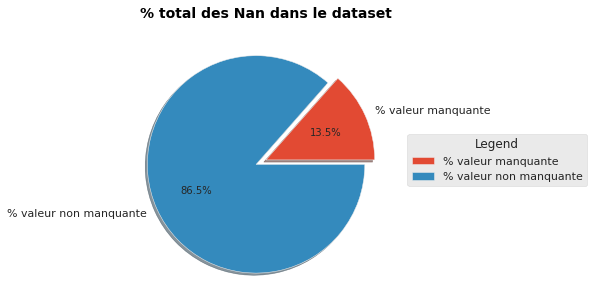

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


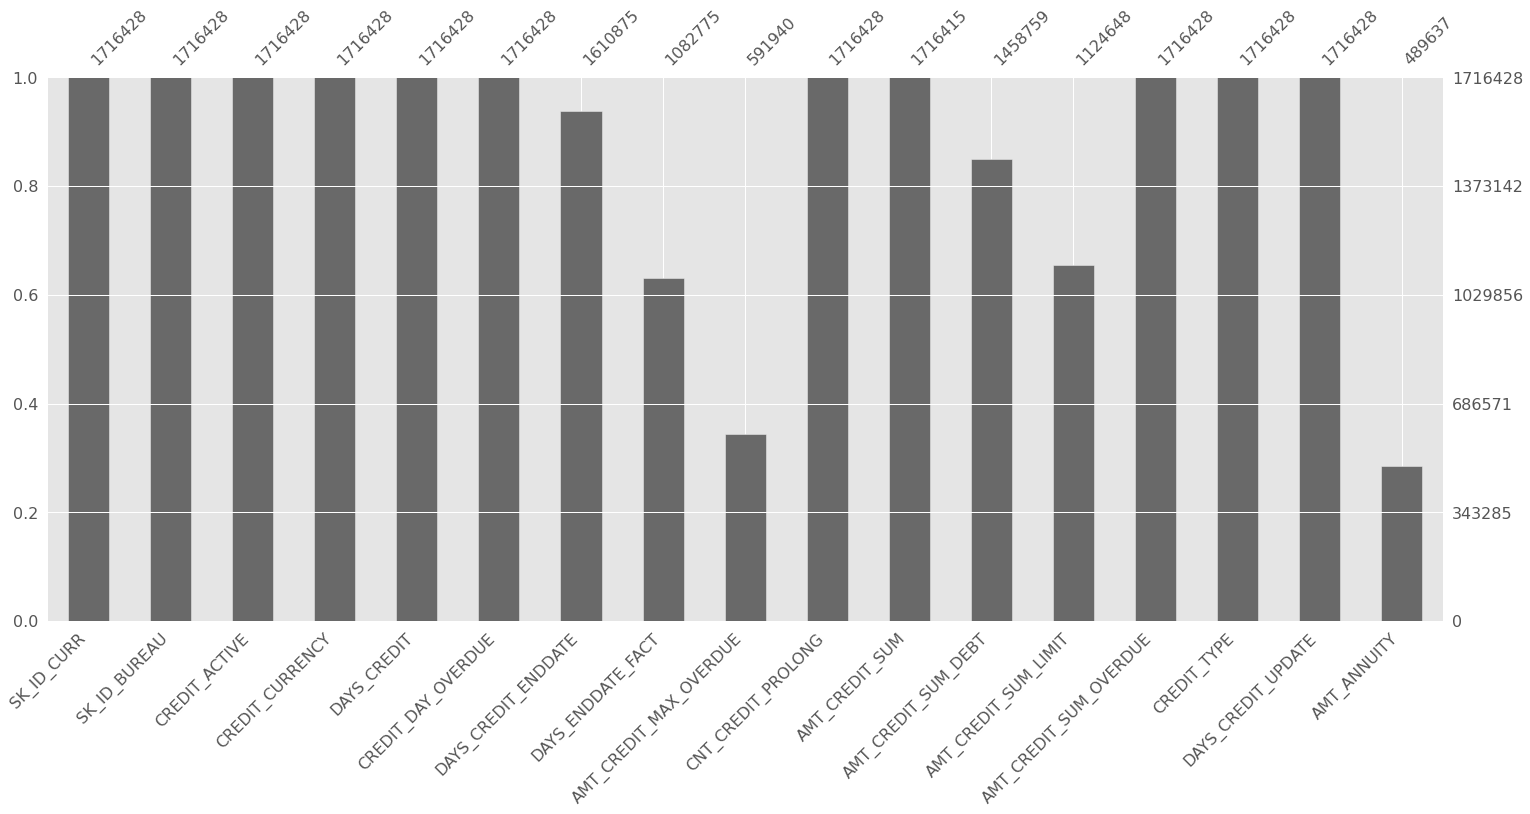

In [ ]:
data_checking(bureau)



##### Données manquantes

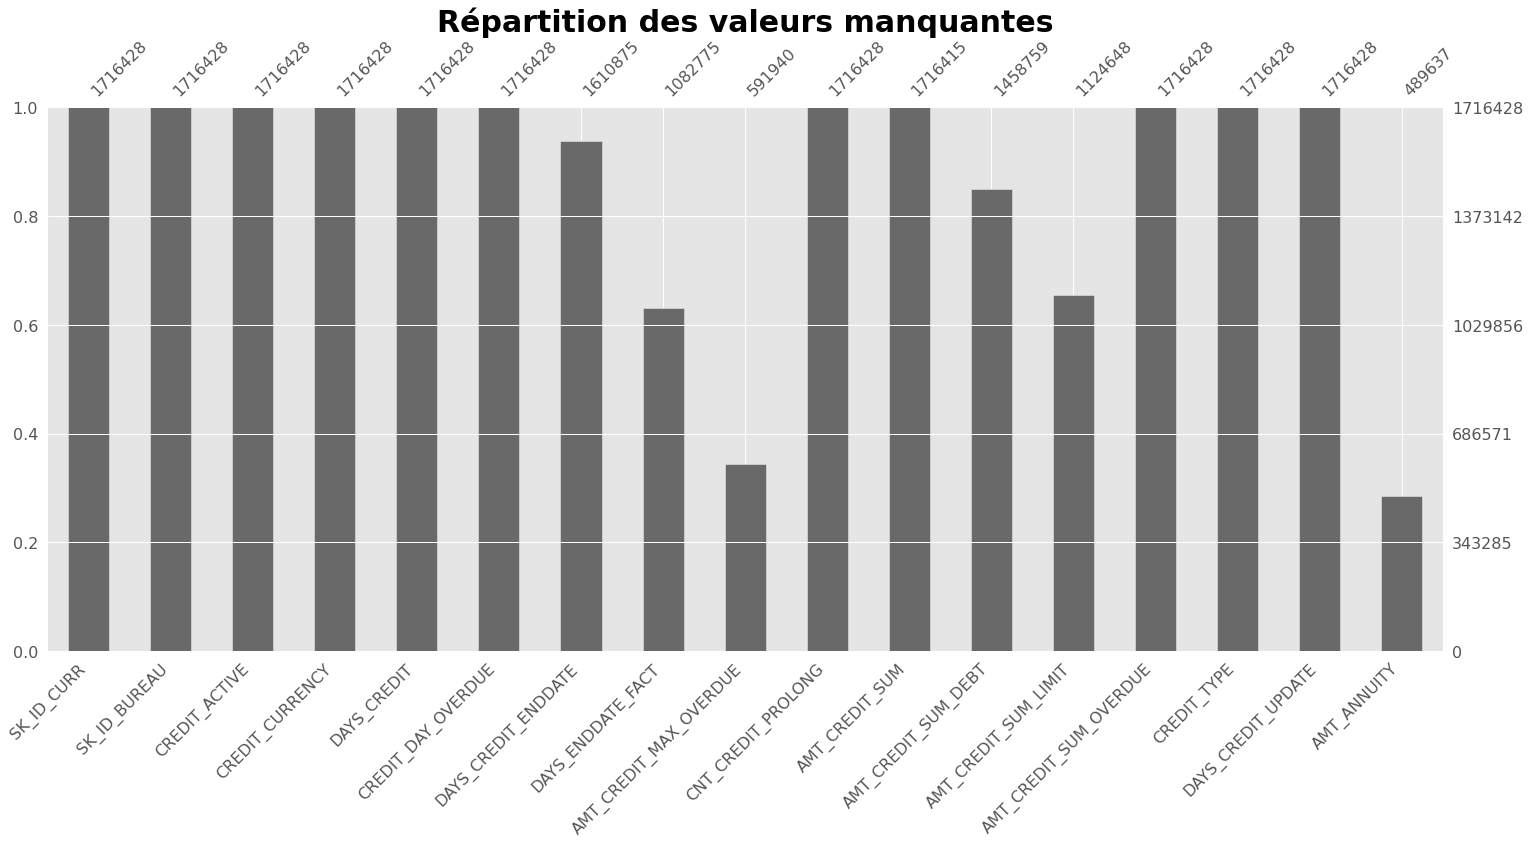

In [ ]:
_= msno.bar(bureau)
_= plt.title("Répartition des valeurs manquantes", fontdict={'fontsize':30})

#### bureau_balance

In [ ]:
# Read data
bureau_balance = pd.read_csv(os.path.join(path, "bureau_balance.csv"),
                              encoding="utf-8")
bureau_balance.head()



SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

Nombre de lignes : 27299925
Nombre de colonnes : 3
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Afficher les 5 premiers lignes du dataset




SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C



Afficher les 5 derniers lignes du dataset




SK_ID_BUREAU  MONTHS_BALANCE STATUS
27299920       5041336             -47      X
27299921       5041336             -48      X
27299922       5041336             -49      X
27299923       5041336             -50      X
27299924       5041336             -51      X



Afficher un resume du dataset




# Columns    # Rows  # Col Types            Col Types and #  Nan total %
0          3  27299925            2  [(int64, 2), (object, 1)]          0.0



Afficher un resume des colonnes du dataset


Le jeu de données contient 27299925 lignes et 3 colonnes.


Columns name    Type  # unique values  # Nan values  % Nan values
0    SK_ID_BUREAU   int64           817395             0           0.0
1  MONTHS_BALANCE   int64               97             0           0.0
2          STATUS  object                8             0           0.0



Afficher un resume des types de colonnes du dataset




Type
int64      2
object     1



Pourcentage des valeurs manquantes dans le dataset




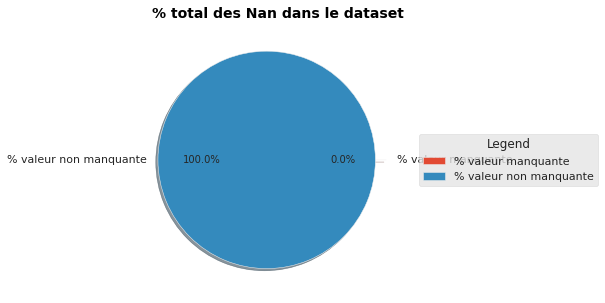

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


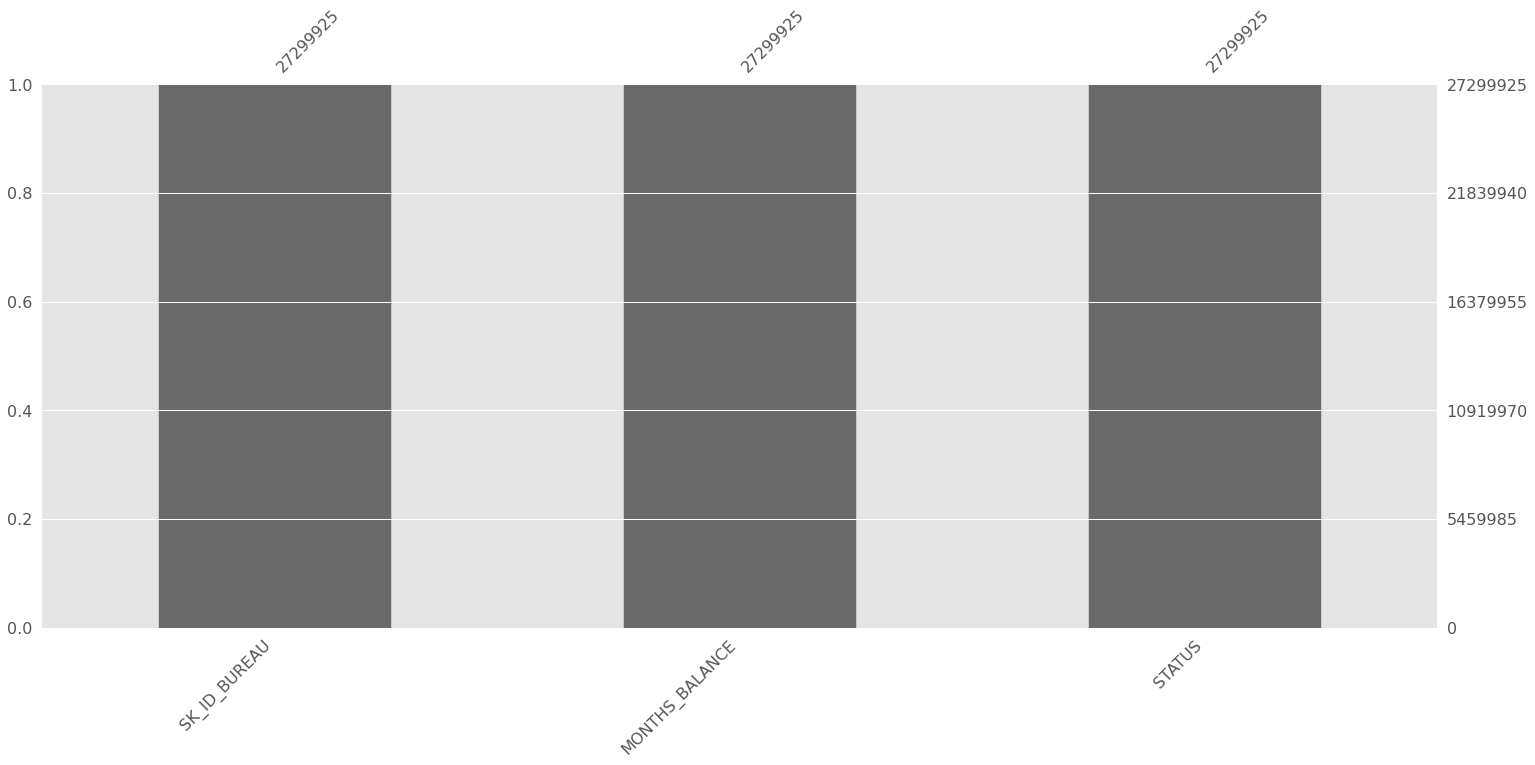

In [ ]:
data_checking(bureau_balance)



##### Données manquantes

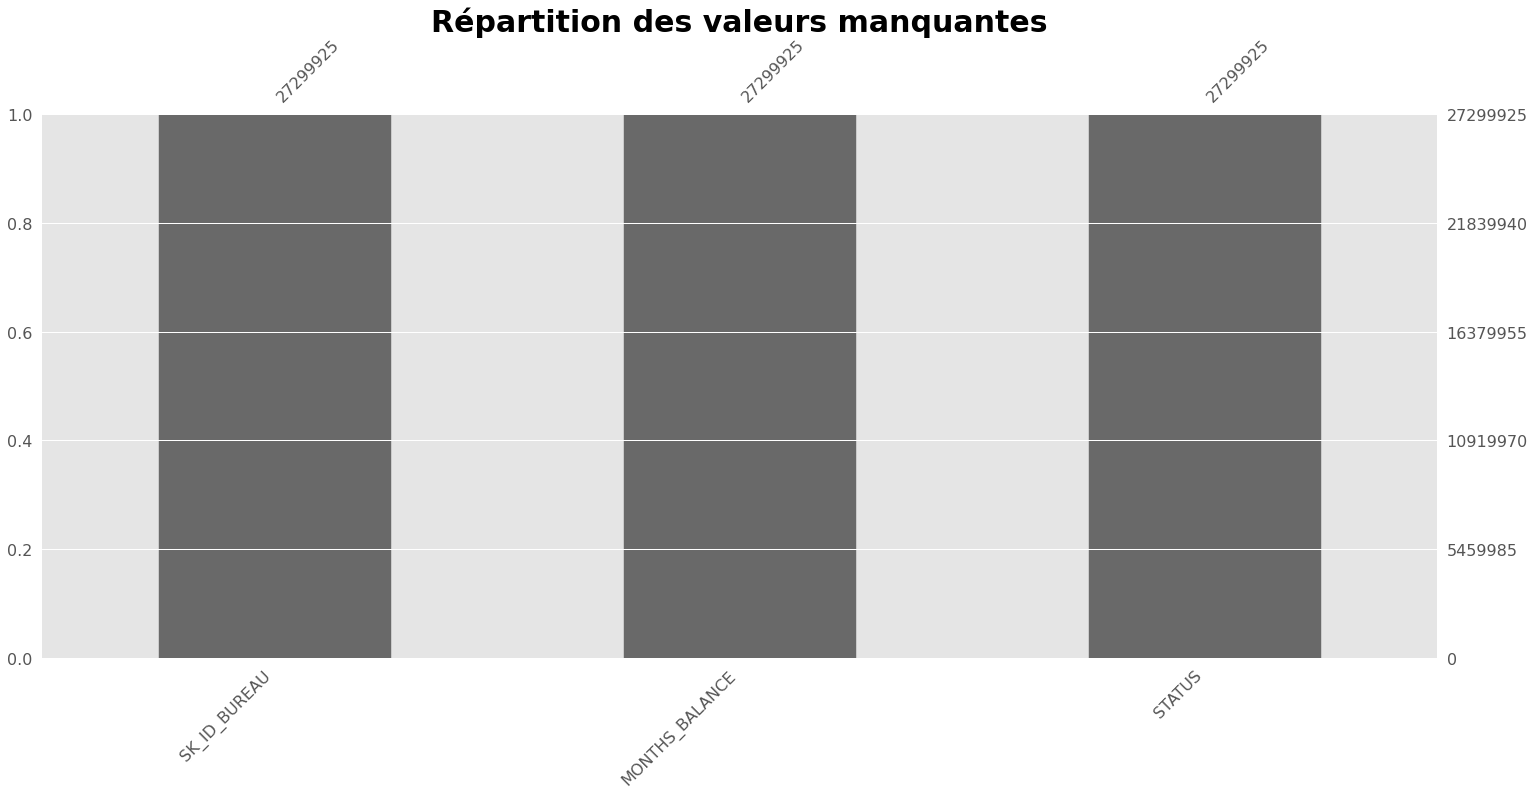

In [ ]:
_= msno.bar(bureau_balance)
_= plt.title("Répartition des valeurs manquantes", fontdict={'fontsize':30})

#### POS_CASH_balance

In [ ]:
# Read data
POS_CASH_balance = pd.read_csv(os.path.join(path, "POS_CASH_balance.csv"),
                              encoding="utf-8")
POS_CASH_balance.head()



SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

Nombre de lignes : 10001358
Nombre de colonnes : 8
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Afficher les 5 premiers lignes du dataset




SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0



Afficher les 5 derniers lignes du dataset




SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
10001353     2448283      226558             -20             6.0   
10001354     1717234      141565             -19            12.0   
10001355     1283126      315695             -21            10.0   
10001356     1082516      450255             -22            12.0   
10001357     1259607      174278             -52            16.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
10001353                    0.0               Active     843           0  
10001354                    0.0               Active     602           0  
10001355                    0.0               Active     609           0  
10001356                    0.0               Active     614           0  
10001357                    0.0            Completed       0           0



Afficher un resume du dataset




# Columns    # Rows  # Col Types                          Col Types and #  \
0          8  10001358            3  [(int64, 5), (float64, 2), (object, 1)]   

   Nan total %  
0     0.065189



Afficher un resume des colonnes du dataset


Le jeu de données contient 10001358 lignes et 8 colonnes.


Columns name     Type  # unique values  # Nan values  % Nan values
0             SK_ID_PREV    int64           936325             0      0.000000
1             SK_ID_CURR    int64           337252             0      0.000000
2         MONTHS_BALANCE    int64               96             0      0.000000
3         CNT_INSTALMENT  float64               74         26071      0.260675
4  CNT_INSTALMENT_FUTURE  float64               80         26087      0.260835
5   NAME_CONTRACT_STATUS   object                9             0      0.000000
6                 SK_DPD    int64             3400             0      0.000000
7             SK_DPD_DEF    int64             2307             0      0.000000



Afficher un resume des types de colonnes du dataset




Type
int64       5
float64     2
object      1



Pourcentage des valeurs manquantes dans le dataset




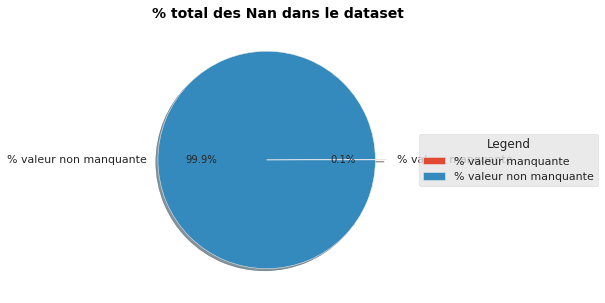

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


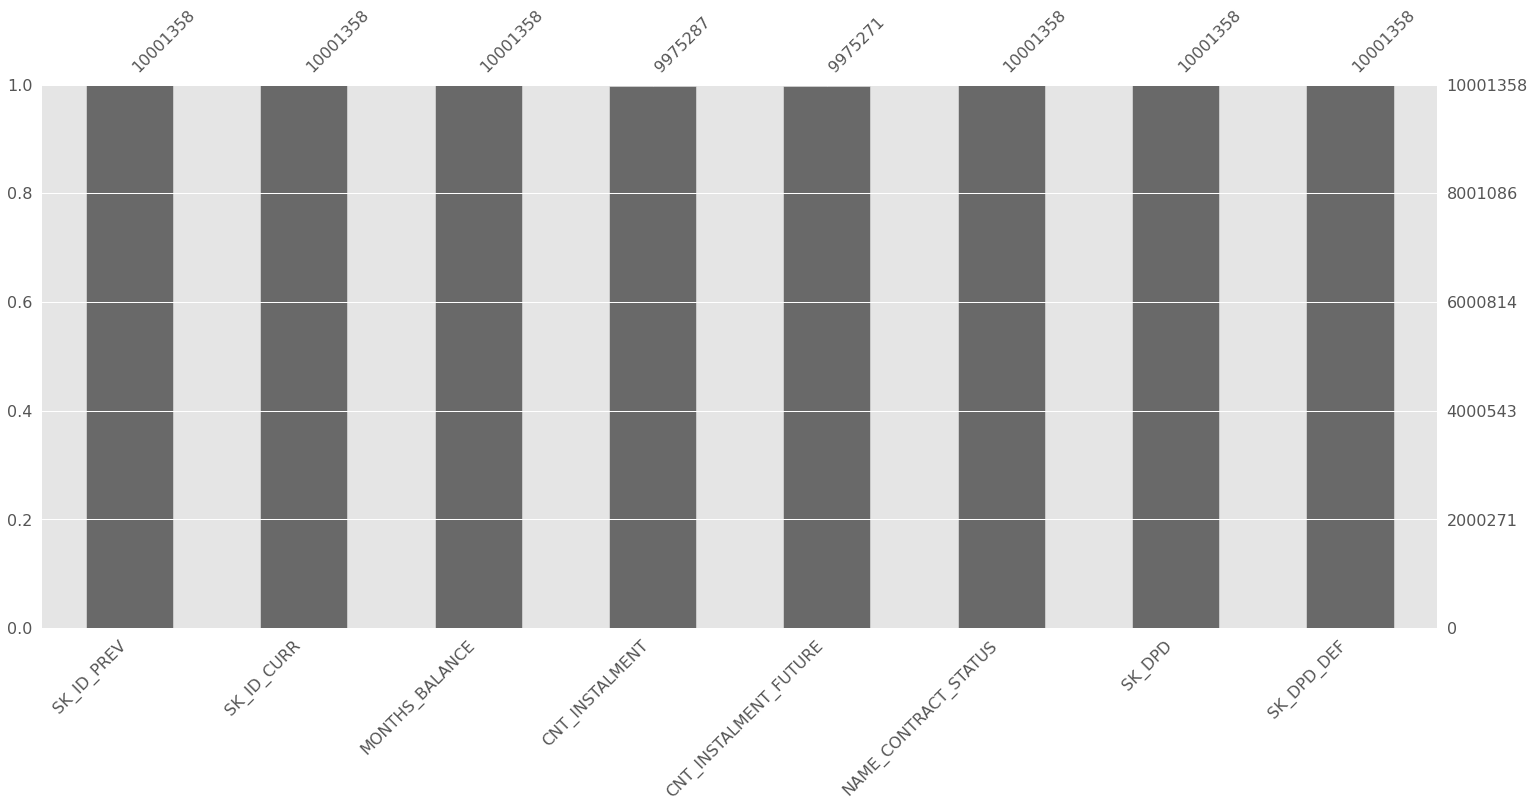

In [ ]:
data_checking(POS_CASH_balance)



##### Données manquantes

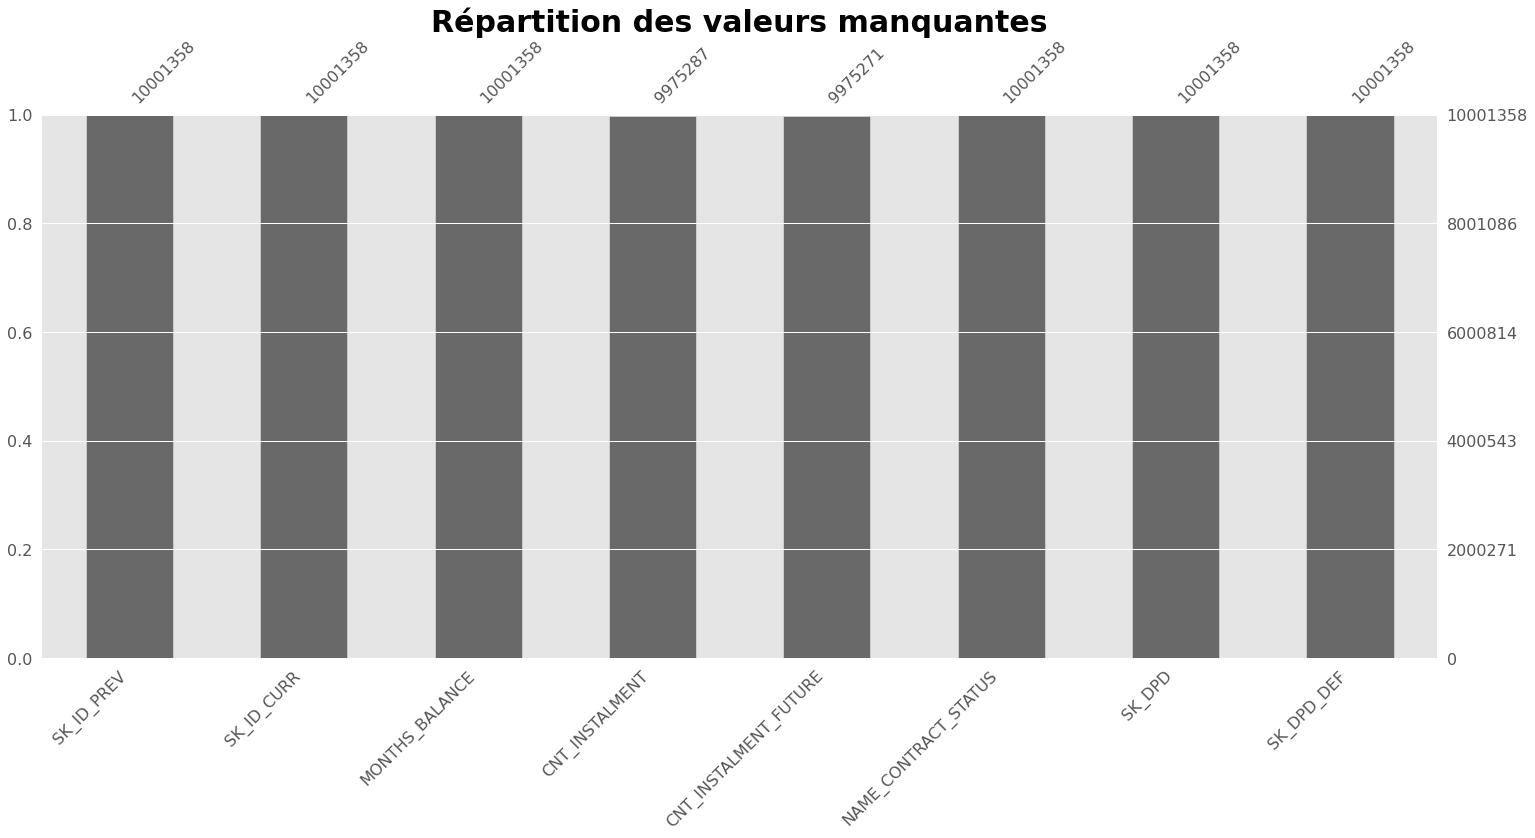

In [ ]:
_= msno.bar(POS_CASH_balance)
_= plt.title("Répartition des valeurs manquantes", fontdict={'fontsize':30})

#### credit_card_balance

In [ ]:
# Read data
credit_card_balance = pd.read_csv(os.path.join(path, "credit_card_balance.csv"),
                              encoding="utf-8")
credit_card_balance.head()



SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

Nombre de lignes : 3840312
Nombre de colonnes : 23
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Afficher les 5 premiers lignes du dataset




SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0



Afficher les 5 derniers lignes du dataset




SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
3840307     1036507      328243              -9        0.000   
3840308     1714892      347207              -9        0.000   
3840309     1302323      215757              -9   275784.975   
3840310     1624872      430337             -10        0.000   
3840311     2411345      236760             -10        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
3840307                    45000                       NaN   
3840308                    45000                       0.0   
3840309                   585000                  270000.0   
3840310                   450000                       NaN   
3840311                   157500                       0.0   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
3840307                   0.0                         NaN   
3840308                   0.0                         0.0   
3840309              270000.0                         0.0   
3840310                   0.0                         NaN   
3840311                   0.0                         0.0   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  \
3840307                       NaN                      0.0   
3840308                       0.0                      0.0   
3840309                       0.0                   2250.0   
3840310                       NaN                      0.0   
3840311                       0.0                      0.0   

         AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
3840307                  NaN                      0.000   
3840308              1879.11                      0.000   
3840309            375750.00                 356994.675   
3840310                  NaN                      0.000   
3840311                 0.00                      0.000   

         AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
3840307                      0.00          0.000                 0.000   
3840308                      0.00          0.000                 0.000   
3840309                 269356.14     273093.975            273093.975   
3840310                      0.00          0.000                 0.000   
3840311                      0.00          0.000                 0.000   

         CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
3840307                       NaN                     0   
3840308                       0.0                     0   
3840309                       2.0                     2   
3840310                       NaN                     0   
3840311                       0.0                     0   

         CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
3840307                         NaN                       NaN   
3840308                         0.0                       0.0   
3840309                         0.0                       0.0   
3840310                         NaN                       NaN   
3840311                         0.0                       0.0   

         CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
3840307                        0.0               Active       0           0  
3840308                       23.0               Active       0           0  
3840309                       18.0               Active       0           0  
3840310                        0.0               Active       0           0  
3840311                       21.0            Completed       0           0



Afficher un resume du dataset




# Columns   # Rows  # Col Types                           Col Types and #  \
0         23  3840312            3  [(float64, 15), (int64, 7), (object, 1)]   

   Nan total %  
0     6.654074



Afficher un resume des colonnes du dataset


Le jeu de données contient 3840312 lignes et 23 colonnes.


Columns name     Type  # unique values  # Nan values  \
0                   SK_ID_PREV    int64           104307             0   
1                   SK_ID_CURR    int64           103558             0   
2               MONTHS_BALANCE    int64               96             0   
3                  AMT_BALANCE  float64          1347904             0   
4      AMT_CREDIT_LIMIT_ACTUAL    int64              181             0   
5     AMT_DRAWINGS_ATM_CURRENT  float64             2268        749816   
6         AMT_DRAWINGS_CURRENT  float64           187005             0   
7   AMT_DRAWINGS_OTHER_CURRENT  float64             1833        749816   
8     AMT_DRAWINGS_POS_CURRENT  float64           168749        749816   
9      AMT_INST_MIN_REGULARITY  float64           312267        305236   
10         AMT_PAYMENT_CURRENT  float64           163210        767988   
11   AMT_PAYMENT_TOTAL_CURRENT  float64           182957             0   
12    AMT_RECEIVABLE_PRINCIPAL  float64          1195839             0   
13               AMT_RECIVABLE  float64          1338878             0   
14        AMT_TOTAL_RECEIVABLE  float64          1339008             0   
15    CNT_DRAWINGS_ATM_CURRENT  float64               45        749816   
16        CNT_DRAWINGS_CURRENT    int64              129             0   
17  CNT_DRAWINGS_OTHER_CURRENT  float64               12        749816   
18    CNT_DRAWINGS_POS_CURRENT  float64              134        749816   
19   CNT_INSTALMENT_MATURE_CUM  float64              122        305236   
20        NAME_CONTRACT_STATUS   object                7             0   
21                      SK_DPD    int64              917             0   
22                  SK_DPD_DEF    int64              378             0   

    % Nan values  
0       0.000000  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
5      19.524872  
6       0.000000  
7      19.524872  
8      19.524872  
9       7.948208  
10     19.998063  
11      0.000000  
12      0.000000  
13      0.000000  
14      0.000000  
15     19.524872  
16      0.000000  
17     19.524872  
18     19.524872  
19      7.948208  
20      0.000000  
21      0.000000  
22      0.000000



Afficher un resume des types de colonnes du dataset




Type
float64    15
int64       7
object      1



Pourcentage des valeurs manquantes dans le dataset




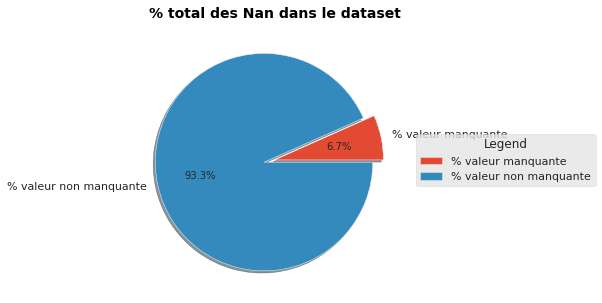

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


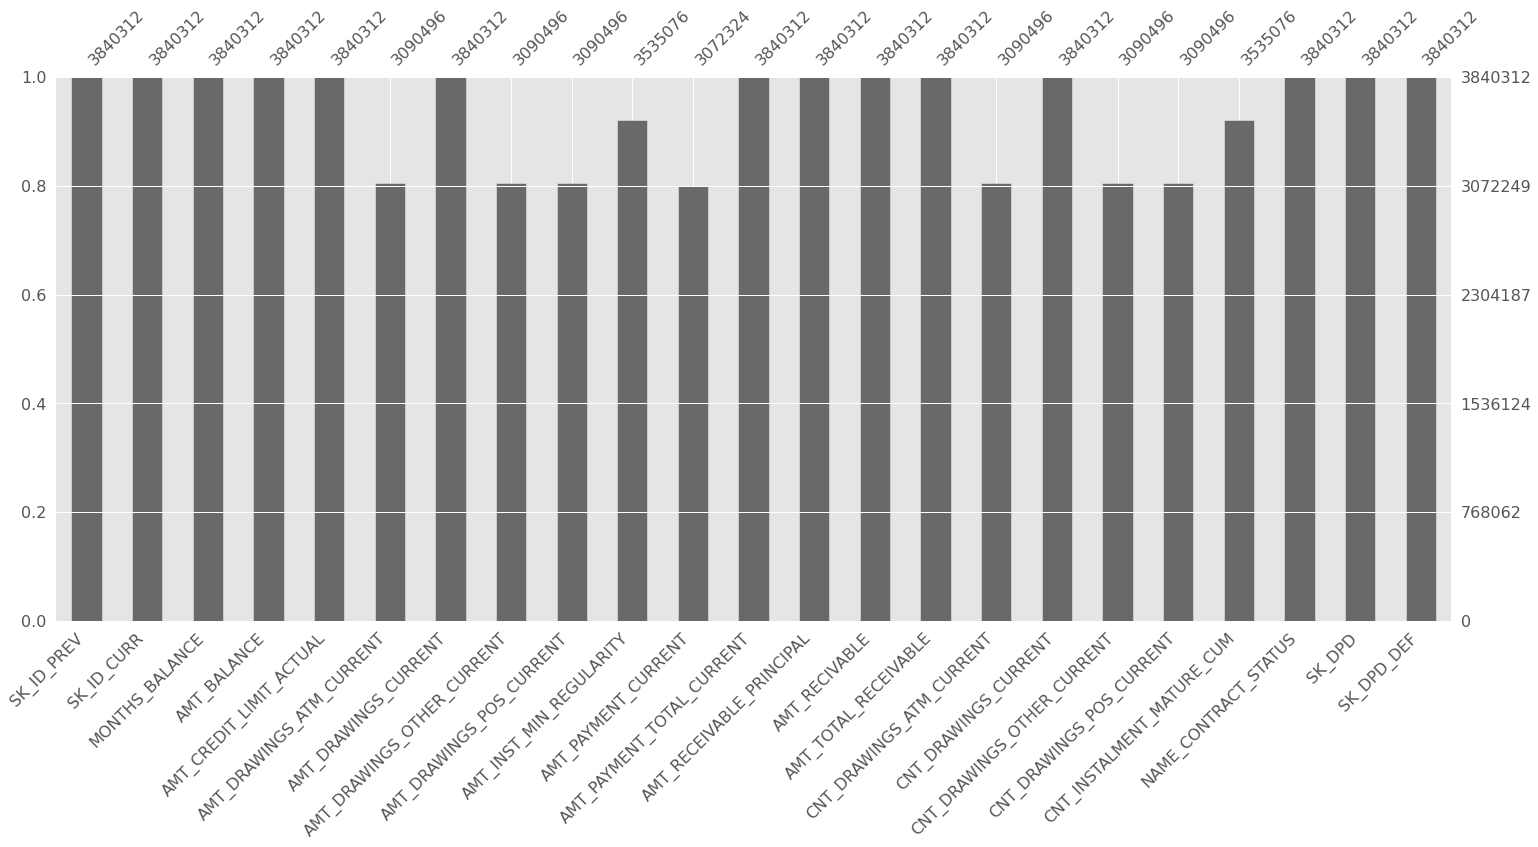

In [ ]:
data_checking(credit_card_balance)



##### Données manquantes

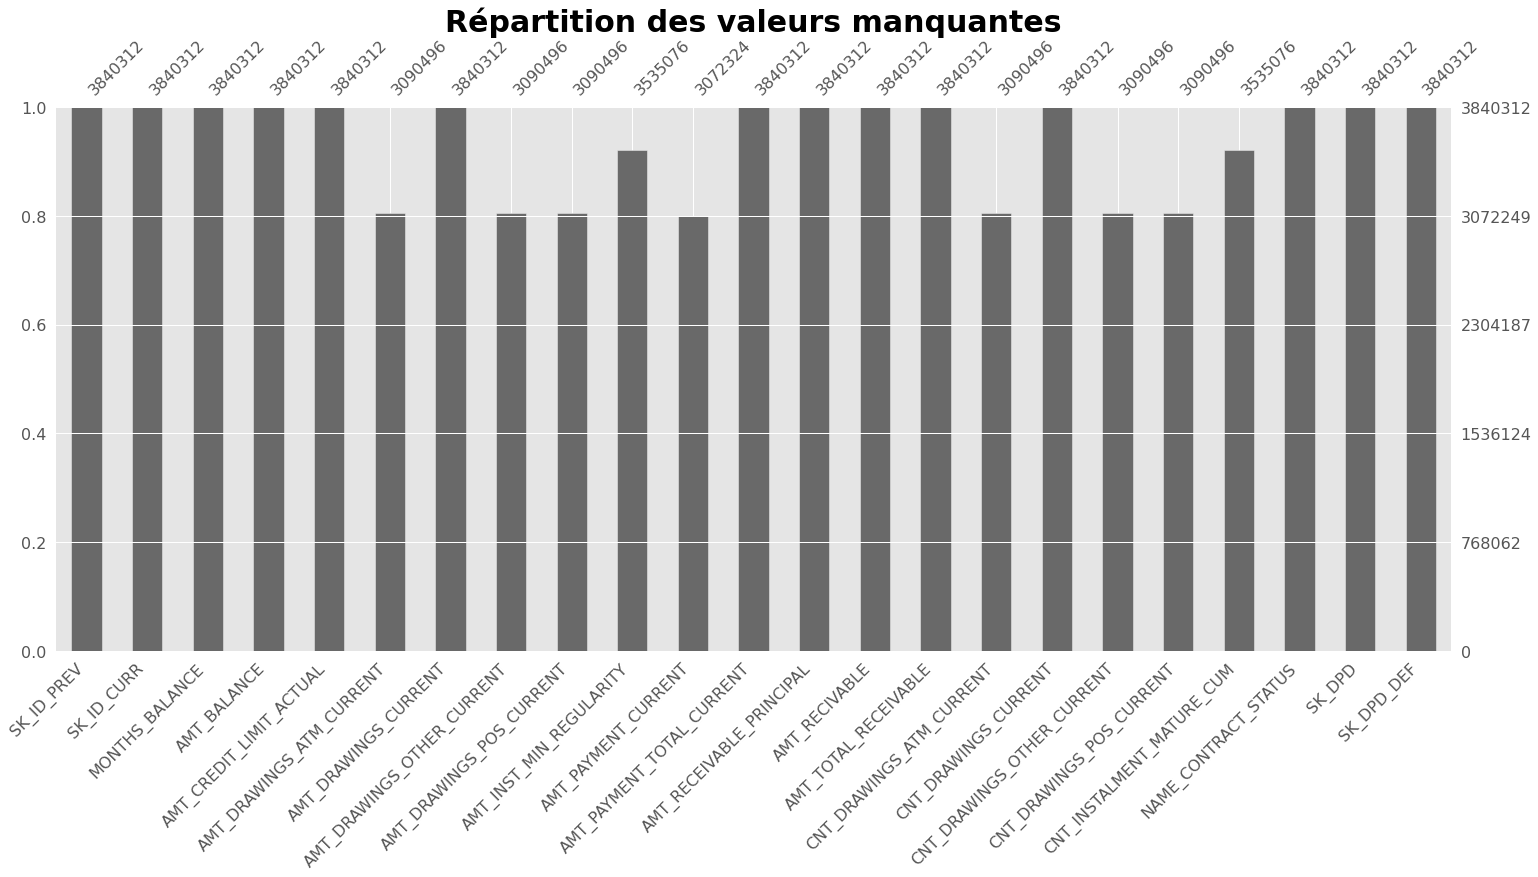

In [ ]:
_= msno.bar(credit_card_balance)
_= plt.title("Répartition des valeurs manquantes", fontdict={'fontsize':30})

#### previous_application

In [ ]:
# Read data
previous_application = pd.read_csv(os.path.join(path, "previous_application.csv"),
                              encoding="utf-8")
previous_application.head()



SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

Nombre de lignes : 1670214
Nombre de colonnes : 37
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Afficher les 5 premiers lignes du dataset




SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D



Afficher les 5 derniers lignes du dataset




SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   
1670212                NaN                    NaN                       NaN   
1670213                NaN                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1670209                    XAP             Approved           -544   
1670210                    XAP             Approved          -1694   
1670211                    XAP             Approved          -1488   
1670212                    XNA             Approved          -1185   
1670213                    XNA             Approved          -1193   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
1670209  Cash through the bank                XAP              NaN   
1670210  Cash through the bank                XAP    Unaccompanied   
1670211  Cash through the bank                XAP  Spouse, partner   
1670212  Cash through the bank                XAP           Family   
1670213  Cash through the bank                XAP           Family   

        NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
1670209        Refreshed             Furniture            POS   
1670210              New             Furniture            POS   
1670211         Repeater  Consumer Electronics            POS   
1670212         Repeater                   XNA           Cash   
1670213         Repeater                   XNA           Cash   

        NAME_PRODUCT_TYPE     CHANNEL_TYPE  SELLERPLACE_AREA  \
1670209               XNA            Stone                43   
1670210               XNA            Stone                43   
1670211               XNA     Country-wide              1370   
1670212            x-sell  AP+ (Cash loan)                -1   
1670213            x-sell  AP+ (Cash loan)                -1   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
1670209             Furniture         30.0       low_normal   
1670210             Furniture         12.0           middle   
1670211  Consumer electronics         10.0       low_normal   
1670212                   XNA         12.0       low



Afficher un resume du dataset




# Columns   # Rows  # Col Types                            Col Types and #  \
0         37  1670214            3  [(object, 16), (float64, 15), (int64, 6)]   

   Nan total %  
0    17.976877



Afficher un resume des colonnes du dataset


Le jeu de données contient 1670214 lignes et 37 colonnes.


Columns name     Type  # unique values  # Nan values  \
0                    SK_ID_PREV    int64          1670214             0   
1                    SK_ID_CURR    int64           338857             0   
2            NAME_CONTRACT_TYPE   object                4             0   
3                   AMT_ANNUITY  float64           357960        372235   
4               AMT_APPLICATION  float64            93885             0   
5                    AMT_CREDIT  float64            86804             1   
6              AMT_DOWN_PAYMENT  float64            29279        895844   
7               AMT_GOODS_PRICE  float64            93886        385515   
8    WEEKDAY_APPR_PROCESS_START   object                7             0   
9       HOUR_APPR_PROCESS_START    int64               24             0   
10  FLAG_LAST_APPL_PER_CONTRACT   object                2             0   
11       NFLAG_LAST_APPL_IN_DAY    int64                2             0   
12            RATE_DOWN_PAYMENT  float64           207034        895844   
13        RATE_INTEREST_PRIMARY  float64              149       1664263   
14     RATE_INTEREST_PRIVILEGED  float64               26       1664263   
15       NAME_CASH_LOAN_PURPOSE   object               25             0   
16         NAME_CONTRACT_STATUS   object                4             0   
17                DAYS_DECISION    int64             2922             0   
18            NAME_PAYMENT_TYPE   object                4             0   
19           CODE_REJECT_REASON   object                9             0   
20              NAME_TYPE_SUITE   object                8        820405   
21             NAME_CLIENT_TYPE   object                4             0   
22          NAME_GOODS_CATEGORY   object               28             0   
23               NAME_PORTFOLIO   object                5             0   
24            NAME_PRODUCT_TYPE   object                3             0   
25                 CHANNEL_TYPE   object                8             0   
26             SELLERPLACE_AREA    int64             2097             0   
27         NAME_SELLER_INDUSTRY   object               11             0   
28                  CNT_PAYMENT  float64               50        372230   
29             NAME_YIELD_GROUP   object                5             0   
30          PRODUCT_COMBINATION   object               18           346   
31           DAYS_FIRST_DRAWING  float64             2839        673065   
32               DAYS_FIRST_DUE  float64             2893        673065   
33    DAYS_LAST_DUE_1ST_VERSION  float64             4606        673065   
34                DAYS_LAST_DUE  float64             2874        673065   
35             DAYS_TERMINATION  float64             2831        673065   
36    NFLAG_INSURED_ON_APPROVAL  float64                3        673065   

    % Nan values  
0       0.000000  
1       0.000000  
2       0.000000  
3      22.286665  
4       0.000000  
5       0.000060  
6      53.636480  
7      23.081773  
8       0.000000  
9       0.000000  
10      0.000000  
11      0.000000  
12     53.636480  
13     99.643698  
14     99.643698  
15      0.000000  
16      0.000000  
17      0.000000  
18      0.000000  
19      0.000000  
20     49.119754  
21      0.000000  
22      0.000000  
23      0.000000  
24      0.000000  
25      0.000000  
26      0.000000  
27      0.000000  
28     22.286366  
29      0.000000  
30      0.020716  
31     40.298129  
32     40.298129  
33     40.298129  
34     40.298129  
35     40.298129  
36     40.298129



Afficher un resume des types de colonnes du dataset




Type
object     16
float64    15
int64       6



Pourcentage des valeurs manquantes dans le dataset




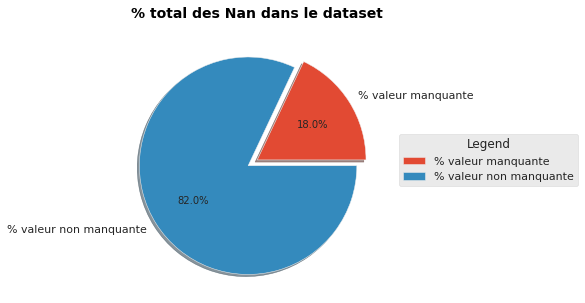

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


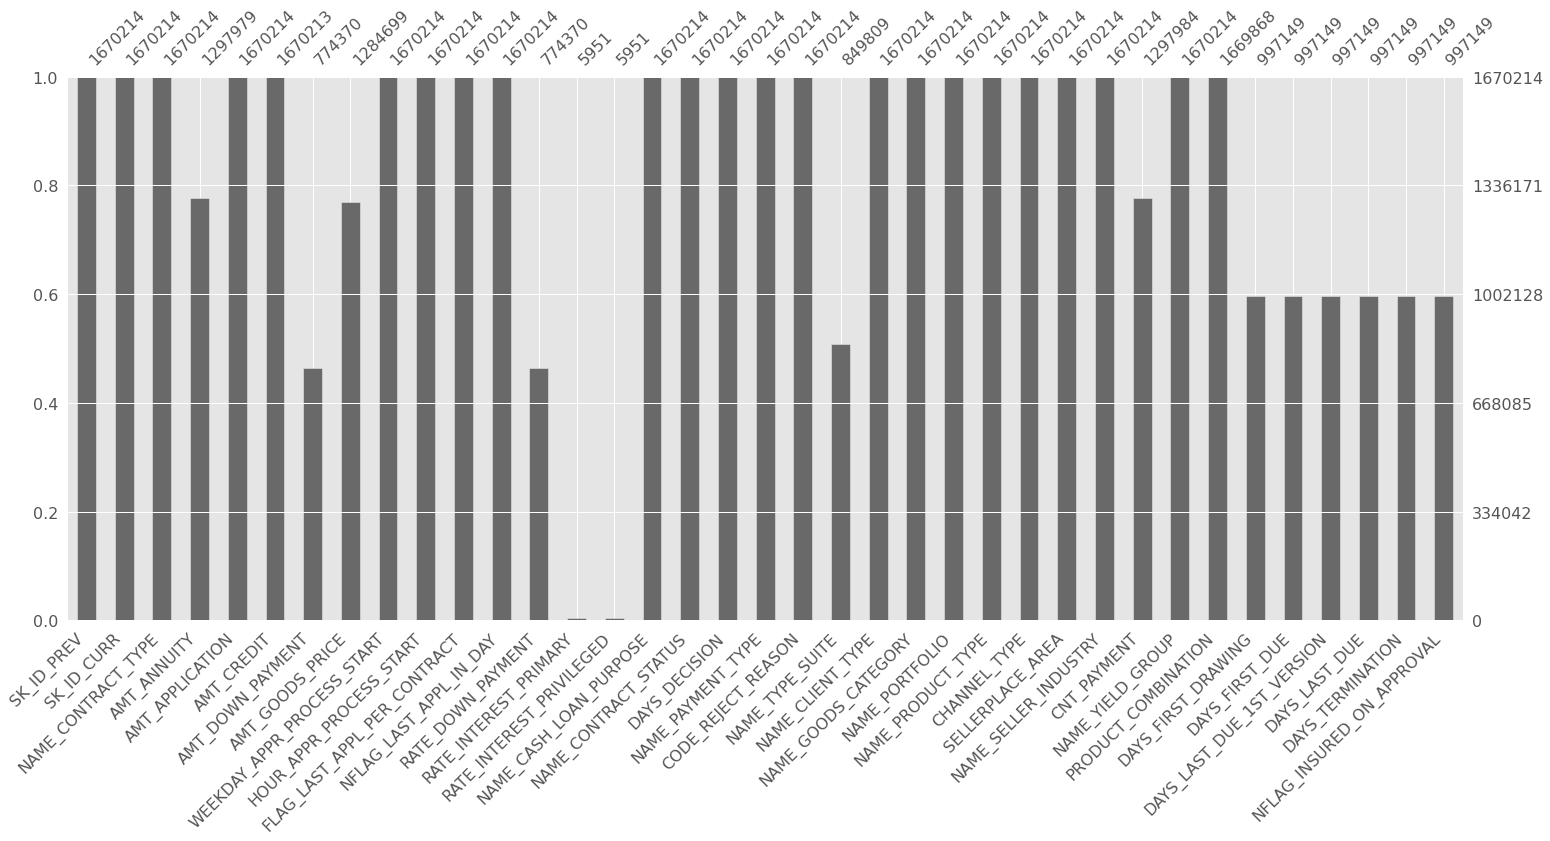

In [ ]:
data_checking(previous_application)



##### Données manquantes

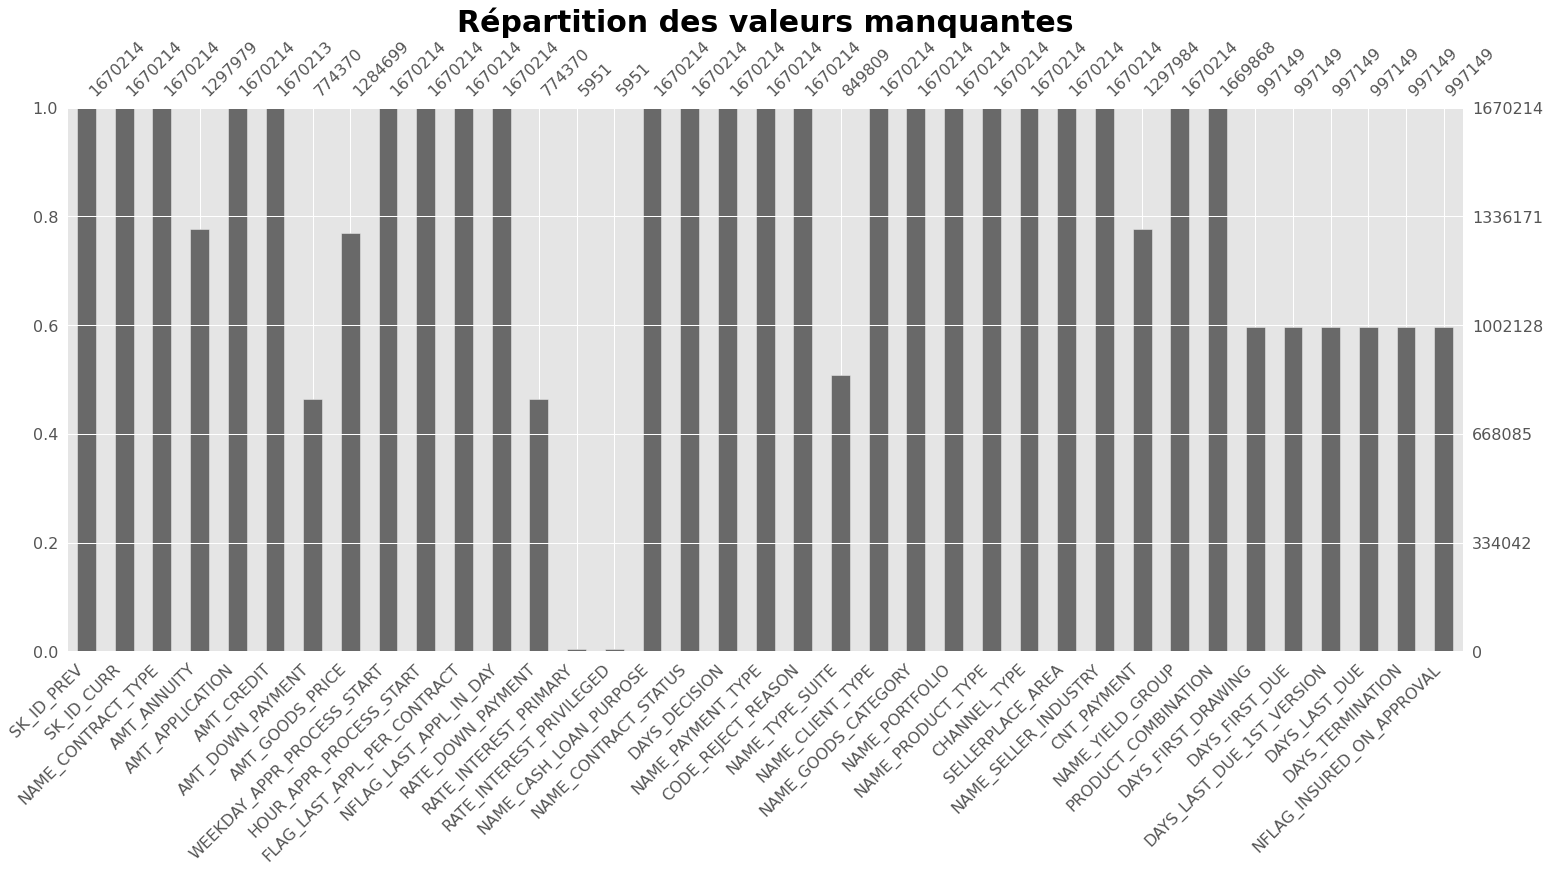

In [ ]:
_= msno.bar(previous_application)
_= plt.title("Répartition des valeurs manquantes", fontdict={'fontsize':30})

#### installments_payments

In [ ]:
# Read data
installments_payments = pd.read_csv(os.path.join(path, "installments_payments.csv"),
                              encoding="utf-8")
installments_payments.head()



SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

Nombre de lignes : 13605401
Nombre de colonnes : 8
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Afficher les 5 premiers lignes du dataset




SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585



Afficher les 5 derniers lignes du dataset




SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
13605396     2186857      428057                     0.0   
13605397     1310347      414406                     0.0   
13605398     1308766      402199                     0.0   
13605399     1062206      409297                     0.0   
13605400     2448869      434321                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
13605396                     66          -1624.0                 NaN   
13605397                     47          -1539.0                 NaN   
13605398                     43             -7.0                 NaN   
13605399                     43          -1986.0                 NaN   
13605400                     19            -27.0                 NaN   

          AMT_INSTALMENT  AMT_PAYMENT  
13605396          67.500          NaN  
13605397          67.500          NaN  
13605398       43737.435          NaN  
13605399          67.500          NaN  
13605400       11504.250          NaN



Afficher un resume du dataset




# Columns    # Rows  # Col Types             Col Types and #  Nan total %
0          8  13605401            2  [(float64, 5), (int64, 3)]     0.005338



Afficher un resume des colonnes du dataset


Le jeu de données contient 13605401 lignes et 8 colonnes.


Columns name     Type  # unique values  # Nan values  \
0              SK_ID_PREV    int64           997752             0   
1              SK_ID_CURR    int64           339587             0   
2  NUM_INSTALMENT_VERSION  float64               65             0   
3   NUM_INSTALMENT_NUMBER    int64              277             0   
4         DAYS_INSTALMENT  float64             2922             0   
5      DAYS_ENTRY_PAYMENT  float64             3040          2905   
6          AMT_INSTALMENT  float64           902539             0   
7             AMT_PAYMENT  float64           944236          2905   

   % Nan values  
0      0.000000  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.000000  
5      0.021352  
6      0.000000  
7      0.021352



Afficher un resume des types de colonnes du dataset




Type
float64     5
int64       3



Pourcentage des valeurs manquantes dans le dataset




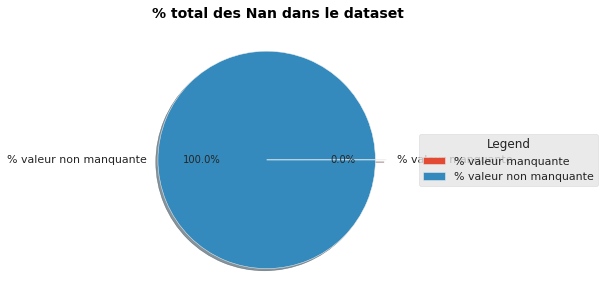

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


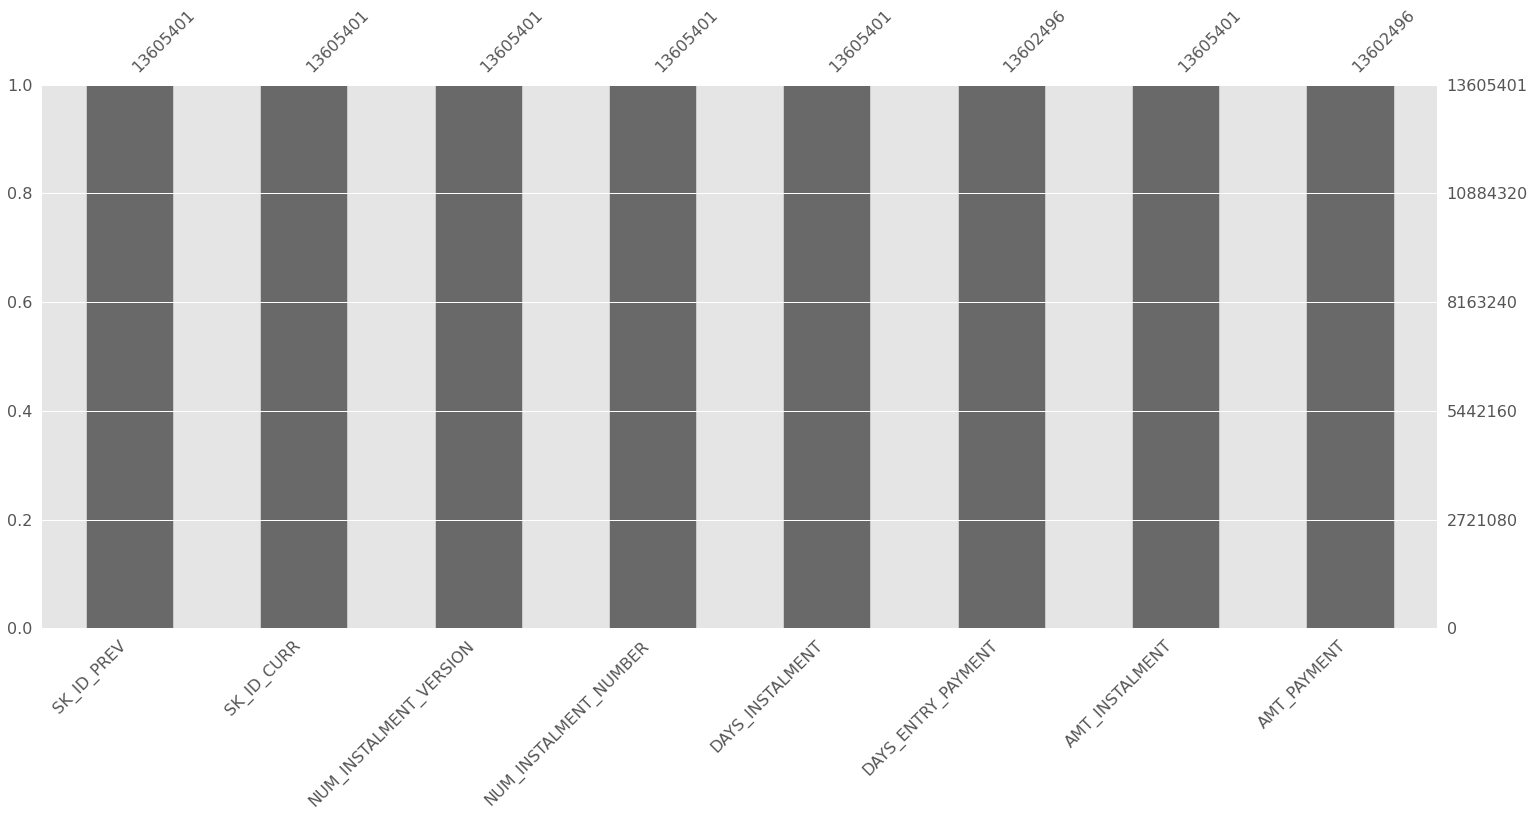

In [ ]:
data_checking(installments_payments)



##### Données manquantes

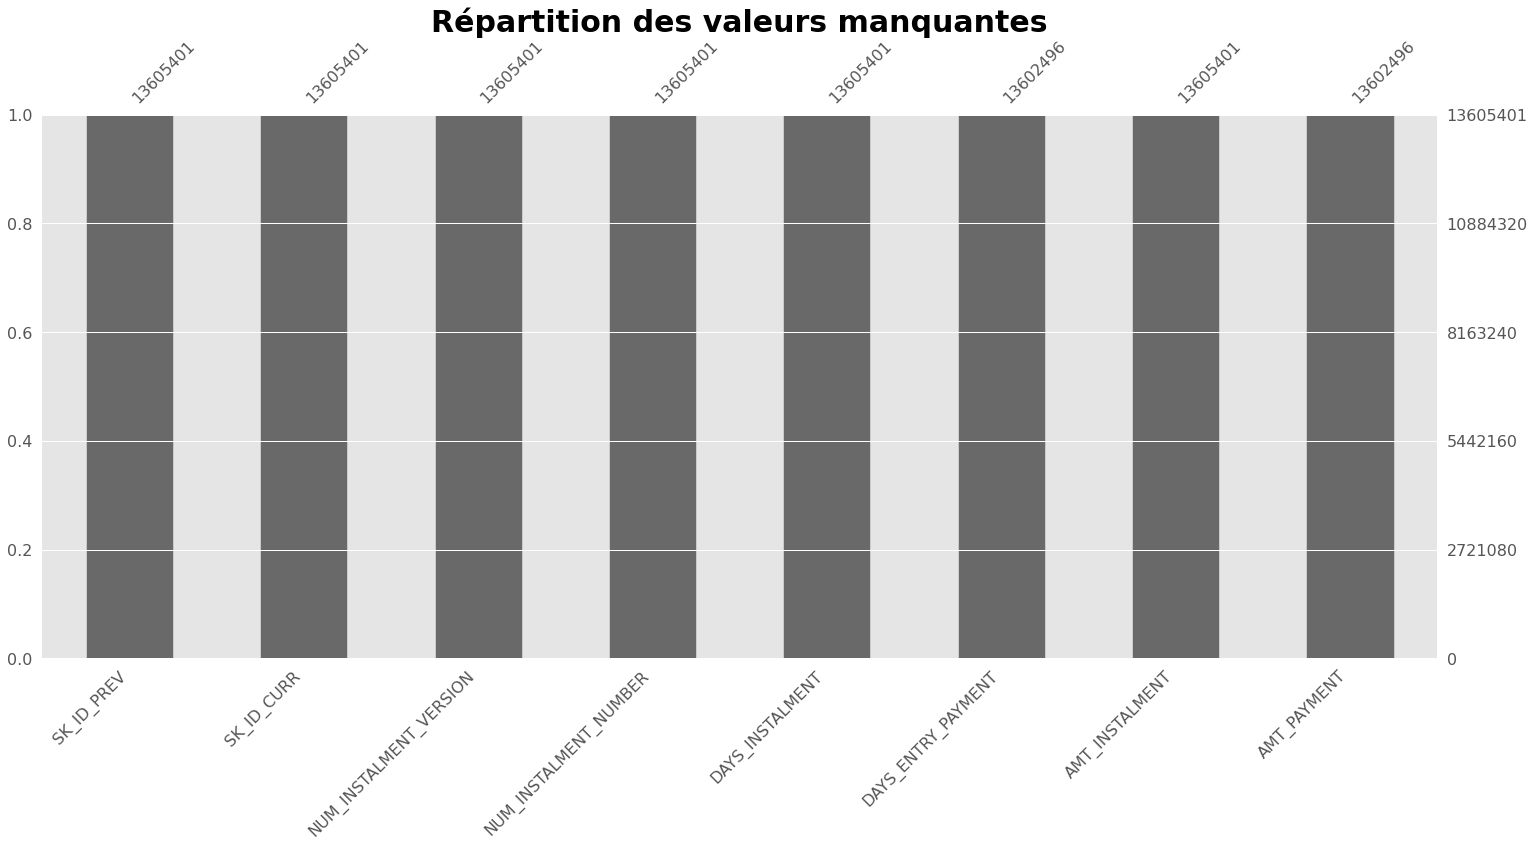

In [ ]:
_= msno.bar(installments_payments)
_= plt.title("Répartition des valeurs manquantes", fontdict={'fontsize':30})

#### Descriptions des variables

Le fichier **HomeCredit_columns_description.csv** contient la liste des tables et des variables avec leurs descriptions.


> L'image ci dessous illustre les relations enre les différents tableaux. 

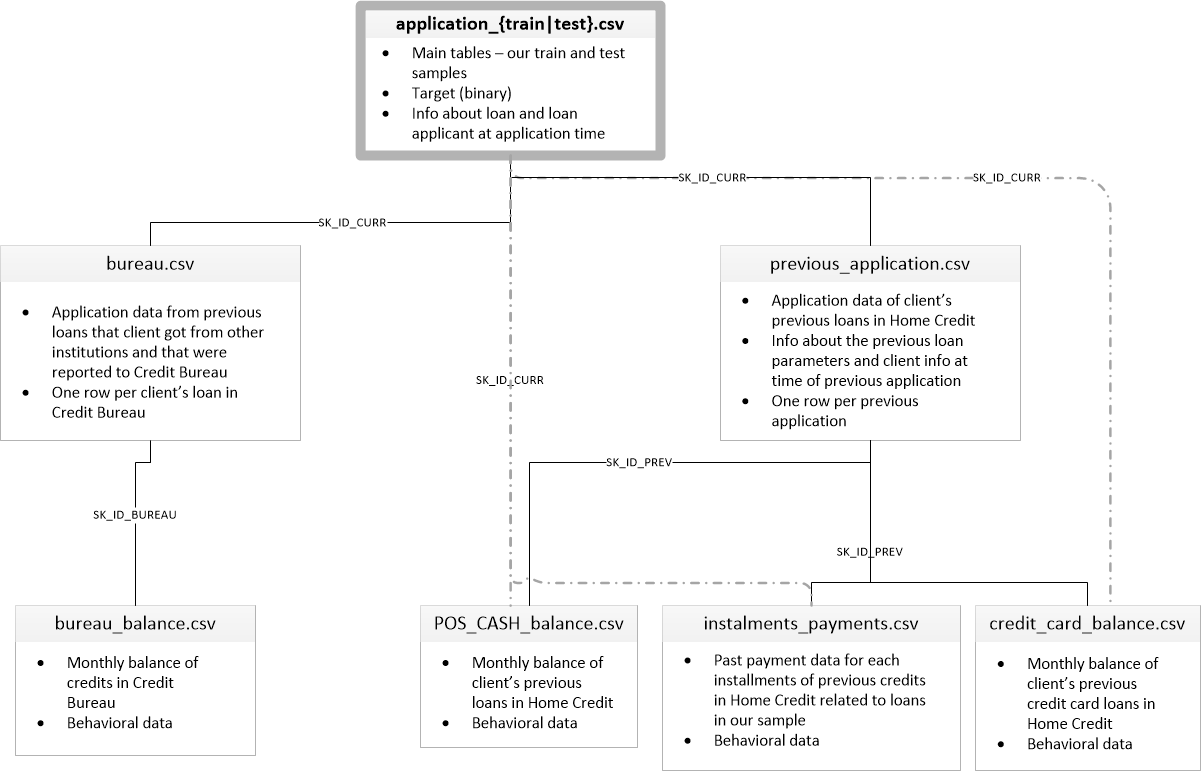

L'étape suivate est de joindres ces différents tableaux dans un seul jeu de données. 

### 3.2 Préparation des données

In [ ]:
# import datacompy

# compare = datacompy.Compare(application_train,
#                             application_test,
#                             join_columns='SK_ID_CURR', #You can also specify a list of columns
#                             abs_tol=0.0001,
#                             rel_tol=0,
#                             df1_name='original',
#                             df2_name='new')
# # Generate the output (in the form of report )
# print(compare.report())


In [ ]:
def get_primary_key(df):

  """
  """
  
  # check the primary ids in the columns of each table
  lst_candidate = [col for col in df.columns if df[col].is_unique]
  print("Possible primary key candidates are: ", lst_candidate, end=2*'\n')
  return lst_candidate


In [ ]:
# Vérifier les candidats possible pour être des clés primaires 
print('Pour le tableau application_train', end='\n')
_= get_primary_key(application_train)

print('Pour le tableau application_test', end='\n')
_= get_primary_key(application_test)

print('Pour le tableau bureau', end='\n')
_= get_primary_key(bureau)

print('Pour le tableau bureau_balance', end='\n')
_= get_primary_key(bureau_balance)

print('Pour le tableau POS_CASH_balance', end='\n')
_= get_primary_key(POS_CASH_balance)

print('Pour le tableau previous_application', end='\n')
_= get_primary_key(previous_application)

print('Pour le tableau installments_payments', end='\n')
_= get_primary_key(installments_payments)

print('Pour le tableau credit_card_balance', end='\n')
_= get_primary_key(credit_card_balance)


Pour le tableau application_train
Possible primary key candidates are:  ['SK_ID_CURR']

Pour le tableau application_test
Possible primary key candidates are:  ['SK_ID_CURR']

Pour le tableau bureau
Possible primary key candidates are:  ['SK_ID_BUREAU']

Pour le tableau bureau_balance
Possible primary key candidates are:  []

Pour le tableau POS_CASH_balance
Possible primary key candidates are:  []

Pour le tableau previous_application
Possible primary key candidates are:  ['SK_ID_PREV']

Pour le tableau installments_payments
Possible primary key candidates are:  []

Pour le tableau credit_card_balance
Possible primary key candidates are:  []



In [ ]:
# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv(os.path.join(path, 'application_train.csv'), nrows= num_rows)
    test_df = pd.read_csv(os.path.join(path, 'application_test.csv'), nrows= num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()

    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']

    docs = [_f for _f in df.columns if 'FLAG_DOC' in _f]
    live = [_f for _f in df.columns if ('FLAG_' in _f) & ('FLAG_DOC' not in _f) & ('_FLAG_' not in _f)]
    
    # cleaning 
    # NaN values for DAYS_EMPLOYED: 365 243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

    # Feature engineering 
    inc_by_org = df[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL']

    df['NEW_CREDIT_TO_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
    df['NEW_CREDIT_TO_GOODS_RATIO']   = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
    df['NEW_DOC_IND_KURT']            = df[docs].kurtosis(axis=1)
    df['NEW_LIVE_IND_SUM']            = df[live].sum(axis=1)
    df['NEW_INC_PER_CHLD']            = df['AMT_INCOME_TOTAL'] / (1 + df['CNT_CHILDREN'])
    df['NEW_INC_BY_ORG']              = df['ORGANIZATION_TYPE'].map(inc_by_org)
    df['NEW_EMPLOY_TO_BIRTH_RATIO']   = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['NEW_ANNUITY_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / (1 + df['AMT_INCOME_TOTAL'])
    df['NEW_SOURCES_PROD']            = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    df['NEW_EXT_SOURCES_MEAN']        = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    df['NEW_SCORES_STD']              = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    df['NEW_SCORES_STD']              = df['NEW_SCORES_STD'].fillna(df['NEW_SCORES_STD'].mean())
    df['NEW_CAR_TO_BIRTH_RATIO']      = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
    df['NEW_CAR_TO_EMPLOY_RATIO']     = df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED']
    df['NEW_PHONE_TO_BIRTH_RATIO']    = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']
    df['NEW_PHONE_TO_BIRTH_RATIO']    = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_EMPLOYED']
    df['NEW_CREDIT_TO_INCOME_RATIO']  = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
    
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC']          = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC']          = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON']           = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC']         = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE']                = df['AMT_ANNUITY'] / df['AMT_CREDIT']

    del test_df
    gc.collect()
    return df

# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv(os.path.join(path, 'bureau.csv'), nrows = num_rows)
    bb = pd.read_csv(os.path.join(path, 'bureau_balance.csv'), nrows = num_rows)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}

    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations})#, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    return bureau_agg

# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv(os.path.join(path, 'previous_application.csv'), nrows = num_rows)
    # prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations}) #, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    return prev_agg

# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv(os.path.join(path, 'POS_CASH_balance.csv'), nrows = num_rows)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    # for cat in cat_cols:
    #     aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg
    
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv(os.path.join(path, 'installments_payments.csv'), nrows = num_rows)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv(os.path.join(path, 'credit_card_balance.csv'), nrows = num_rows)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

In [ ]:
import gc
import time
from contextlib import contextmanager

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

num_rows = None

df = application_train_test(num_rows)
with timer("Process bureau and bureau_balance"):
    bureau = bureau_and_balance(num_rows)
    print("Bureau df shape:", bureau.shape)
    df = df.join(bureau, how='left', on='SK_ID_CURR')
    del bureau
    gc.collect()

with timer("Process previous_applications"):
    prev = previous_applications(num_rows)
    print("Previous applications df shape:", prev.shape)
    df = df.join(prev, how='left', on='SK_ID_CURR')
    del prev
    gc.collect()

with timer("Process POS-CASH balance"):
    pos = pos_cash(num_rows)
    print("Pos-cash balance df shape:", pos.shape)
    df = df.join(pos, how='left', on='SK_ID_CURR')
    del pos
    gc.collect()

with timer("Process installments payments"):
    ins = installments_payments(num_rows)
    print("Installments payments df shape:", ins.shape)
    df = df.join(ins, how='left', on='SK_ID_CURR')
    del ins
    gc.collect()

with timer("Process credit card balance"):
    cc = credit_card_balance(num_rows)
    print("Credit card balance df shape:", cc.shape)
    df = df.join(cc, how='left', on='SK_ID_CURR')
    del cc
    gc.collect()

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 27)
Process bureau and bureau_balance - done in 11s
Previous applications df shape: (338857, 30)
Process previous_applications - done in 8s
Pos-cash balance df shape: (337252, 8)
Process POS-CASH balance - done in 7s
Installments payments df shape: (339587, 26)
Process installments payments - done in 28s
Credit card balance df shape: (103558, 101)
Process credit card balance - done in 38s


Nombre de lignes : 356251
Nombre de colonnes : 335
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Afficher les 5 premiers lignes du dataset




index  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      0      100002     1.0         Cash loans           M            N   
1      1      100003     0.0         Cash loans           F            N   
2      2      100004     0.0    Revolving loans           M            Y   
3      3      100006     0.0         Cash loans           F            N   
4      4      100007     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461         -637.0            -3648.0   
1                    0.003541      -16765        -1188.0            -1186.0   
2                    0.010032      -19046         -225.0            -4260.0   
3                    0.008019      -19005        -3039.0            -9833.0   
4                    0.028663      -19932        -3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0               



Afficher les 5 derniers lignes du dataset




index  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
356250  48739      456221     NaN         Cash loans           F            N   
356251  48740      456222     NaN         Cash loans           F            N   
356252  48741      456223     NaN         Cash loans           F            Y   
356253  48742      456224     NaN         Cash loans           M            N   
356254  48743      456250     NaN         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
356250               Y             0          121500.0    412560.0   
356251               N             2          157500.0    622413.0   
356252               Y             1          202500.0    315000.0   
356253               N             0          225000.0    450000.0   
356254               N             0          135000.0    312768.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
356250      17473.5         270000.0   Unaccompanied               Working   
356251      31909.5         495000.0   Unaccompanied  Commercial associate   
356252      33205.5         315000.0   Unaccompanied  Commercial associate   
356253      25128.0         450000.0          Family  Commercial associate   
356254      24709.5         270000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
356250  Secondary / secondary special              Widow  House / apartment   
356251  Secondary / secondary special            Married  House / apartment   
356252  Secondary / secondary special            Married  House / apartment   
356253               Higher education            Married  House / apartment   
356254  Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
356250                    0.002042      -19970        -5169.0   
356251                    0.035792      -11186        -1149.0   
356252                    0.026392      -15922        -3037.0   
356253                    0.018850      -13968        -2731.0   
356254                    0.006629      -13962         -633.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
356250            -9094.0            -3399          NaN           1   
356251            -3015.0            -3003          NaN           1   
356252            -2681.0            -1504          4.0           1   
356253            -1461.0            -1364          NaN           1   
356254            -1072.0            -4220         22.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
356250               1                1                 1           1   
356251               1                0                 1           0   
356252               1                0                 1           1   
356253               1                1                 1           1   
356254               1                1                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
356250           0             NaN              1.0                     3   
356251           0     Sales staff              4.0                     2   
356252           0             NaN              3.0                     2   
356253           0        Managers              2.0                     2   
356254           0      Core staff              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
356250                            3                  WEDNESDAY   
356251                            2                     MONDAY   
356252                            2                  WEDNESDAY   
356253                            2                     MONDAY   
356254                            2                    TUESDAY   

        HOUR_APPR_PROCESS_START  REG_RE



Afficher un resume du dataset




# Columns  # Rows  # Col Types  \
0        335  356251            3   

                               Col Types and #  Nan total %  
0  [(float64, 278), (int64, 41), (object, 16)]    34.962105



Afficher un resume des colonnes du dataset


Le jeu de données contient 356251 lignes et 335 colonnes.


Columns name     Type  # unique values  \
0                                    index    int64           307509   
1                               SK_ID_CURR    int64           356251   
2                                   TARGET  float64                3   
3                       NAME_CONTRACT_TYPE   object                2   
4                              CODE_GENDER   object                2   
5                             FLAG_OWN_CAR   object                2   
6                          FLAG_OWN_REALTY   object                2   
7                             CNT_CHILDREN    int64               16   
8                         AMT_INCOME_TOTAL  float64             2741   
9                               AMT_CREDIT  float64             6480   
10                             AMT_ANNUITY  float64            14167   
11                         AMT_GOODS_PRICE  float64             1292   
12                         NAME_TYPE_SUITE   object                8   
13                        NAME_INCOME_TYPE   object                8   
14                     NAME_EDUCATION_TYPE   object                5   
15                      NAME_FAMILY_STATUS   object                6   
16                       NAME_HOUSING_TYPE   object                6   
17              REGION_POPULATION_RELATIVE  float64               82   
18                              DAYS_BIRTH    int64            17467   
19                           DAYS_EMPLOYED  float64            12896   
20                       DAYS_REGISTRATION  float64            15898   
21                         DAYS_ID_PUBLISH    int64             6224   
22                             OWN_CAR_AGE  float64               64   
23                              FLAG_MOBIL    int64                2   
24                          FLAG_EMP_PHONE    int64                2   
25                         FLAG_WORK_PHONE    int64                2   
26                        FLAG_CONT_MOBILE    int64                2   
27                              FLAG_PHONE    int64                2   
28                              FLAG_EMAIL    int64                2   
29                         OCCUPATION_TYPE   object               19   
30                         CNT_FAM_MEMBERS  float64               19   
31                    REGION_RATING_CLIENT    int64                3   
32             REGION_RATING_CLIENT_W_CITY    int64                4   
33              WEEKDAY_APPR_PROCESS_START   object                7   
34                 HOUR_APPR_PROCESS_START    int64               24   
35              REG_REGION_NOT_LIVE_REGION    int64                2   
36              REG_REGION_NOT_WORK_REGION    int64                2   
37             LIVE_REGION_NOT_WORK_REGION    int64                2   
38                  REG_CITY_NOT_LIVE_CITY    int64                2   
39                  REG_CITY_NOT_WORK_CITY    int64                2   
40                 LIVE_CITY_NOT_WORK_CITY    int64                2   
41                       ORGANIZATION_TYPE   object               58   
42                            EXT_SOURCE_1  float64           134316   
43                            EXT_SOURCE_2  float64           127157   
44                            EXT_SOURCE_3  float64              815   
45                          APARTMENTS_AVG  float64             2392   
46                        BASEMENTAREA_AVG  float64             3832   
47             YEARS_BEGINEXPLUATATION_AVG  float64              295   
48                         YEARS_BUILD_AVG  float64              150   
49                          COMMONAREA_AVG  float64             3272   
50                           ELEVATORS_AVG  float64              267   
51                           ENTRANCES_AVG  float64              295   
52                           FLOORSMAX_AVG  float64              415   
53                           FLOORSMIN_AVG  float64              319   
54                            LANDAREA_AVG  float64             3581  



Afficher un resume des types de colonnes du dataset




Type
float64   278
int64      41
object     16



Pourcentage des valeurs manquantes dans le dataset




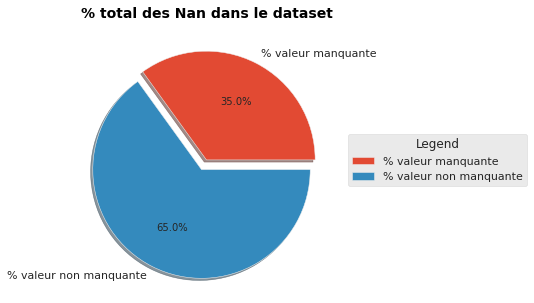

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


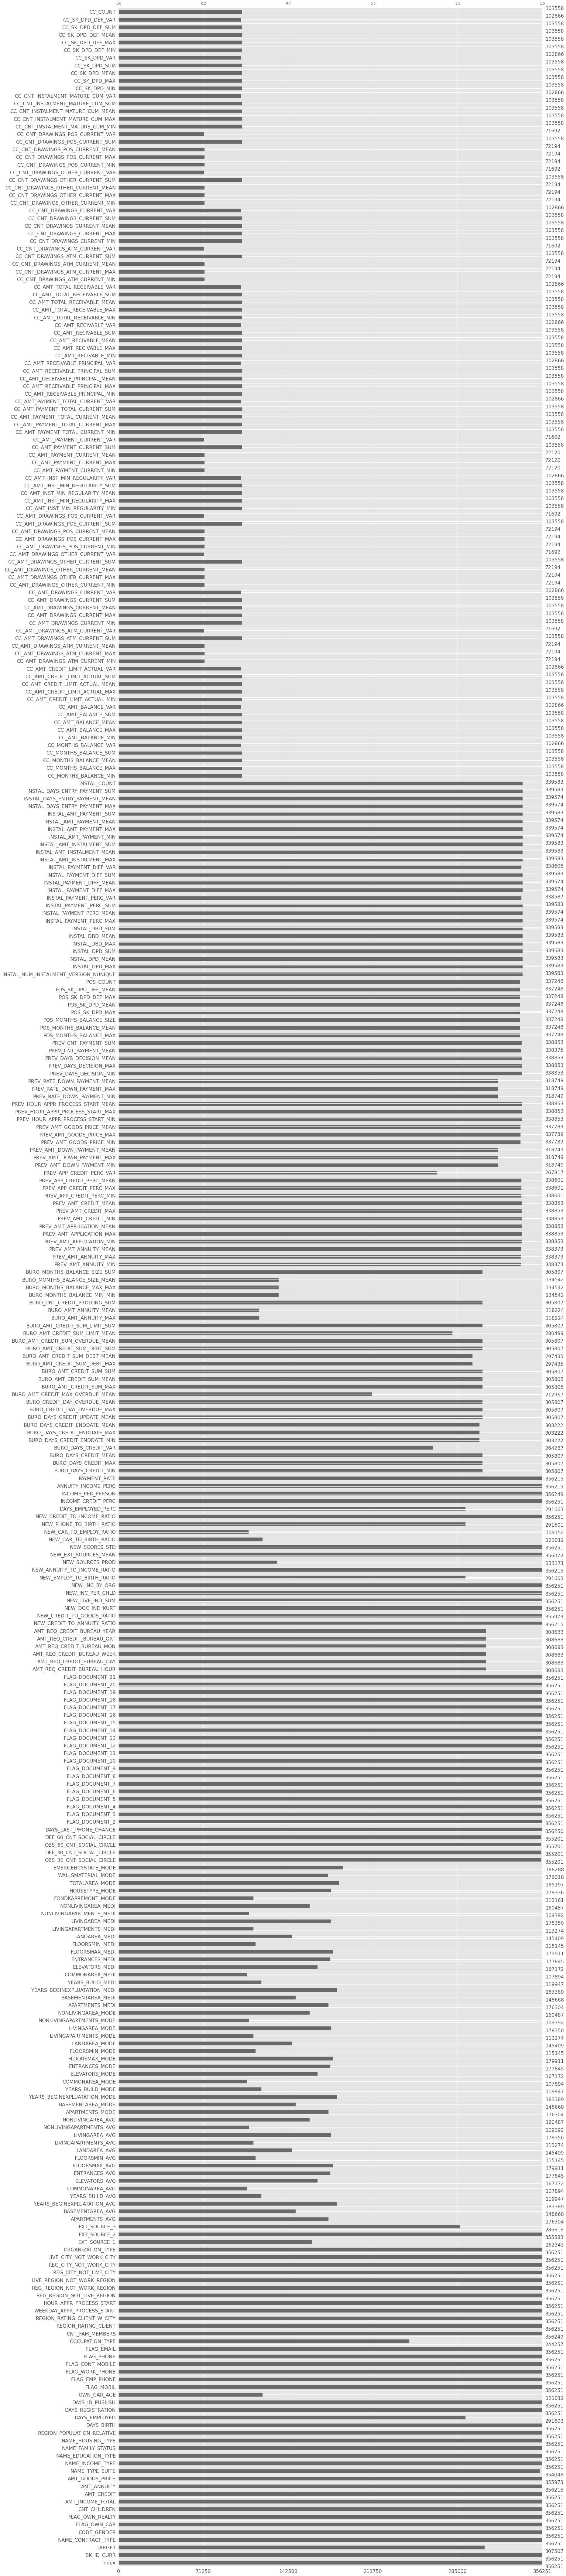

In [ ]:
data_checking(df) 

On enregistre le dataframe obtenu

In [ ]:
df.to_csv(os.path.join(path, "df_fusione.csv"))